In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG, display

!pip install shap
import shap

import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#load Dataset
path = 'csv_file/testData.csv'
df = pd.read_csv(path)

In [5]:
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [4]:
#Dataset view
df.head(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
#Dataset Rows and column count
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 3390
Number of columns: 17


In [6]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
#Dataset duplicate count
print(f'Number of duplicated rows in the dataset: {df.duplicated().sum()}')

Number of duplicated rows in the dataset: 0


In [8]:
df['id'].duplicated().sum()

0

In [9]:
#check missing values
print(f'There are {df.isna().sum().sum()} missing values in the dataset\n')
df.isna().sum()

There are 510 missing values in the dataset



id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<AxesSubplot:>

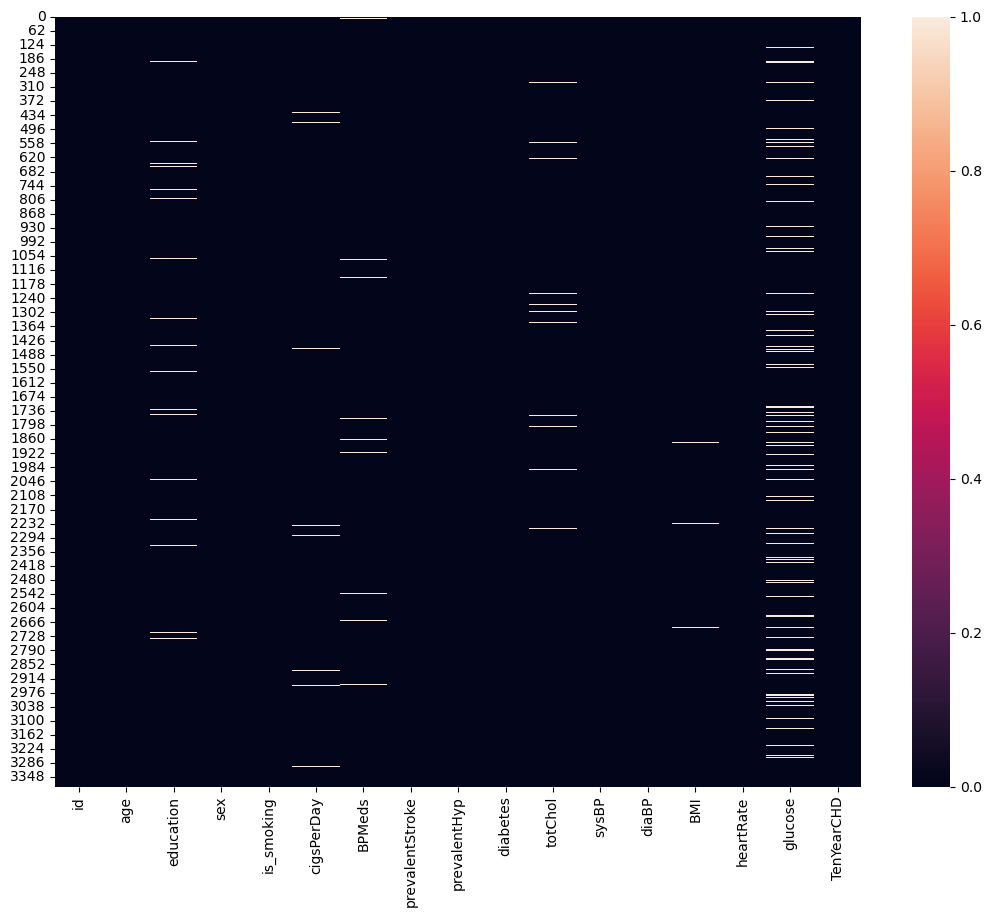

In [10]:
plt.figure(figsize=(13,10))
sns.heatmap(df.isna())

In [11]:
#include conclusion of given dataset


In [12]:
#list of columns 
df.columns


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
#describing Dataset
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [14]:

# Splitting the categorical and continuous variables
categ_vars = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
cont_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [15]:
# Check Unique Values for categorical variables
for var in categ_vars:
  print(f'Unique values in {var} are: {df[var].dropna().unique()})')

Unique values in sex are: ['F' 'M'])
Unique values in education are: [2. 4. 1. 3.])
Unique values in is_smoking are: ['YES' 'NO'])
Unique values in BPMeds are: [0. 1.])
Unique values in prevalentStroke are: [0 1])
Unique values in prevalentHyp are: [0 1])
Unique values in diabetes are: [0 1])


In [16]:
# Checking the values for id
print(f"The number of unique IDs in dataset are {df['id'].nunique()},with the minimum as {df['id'].min()} and maximum as {df['id'].max()}")

The number of unique IDs in dataset are 3390,with the minimum as 0 and maximum as 3389


# Data Visualization

In [17]:
sns.set()

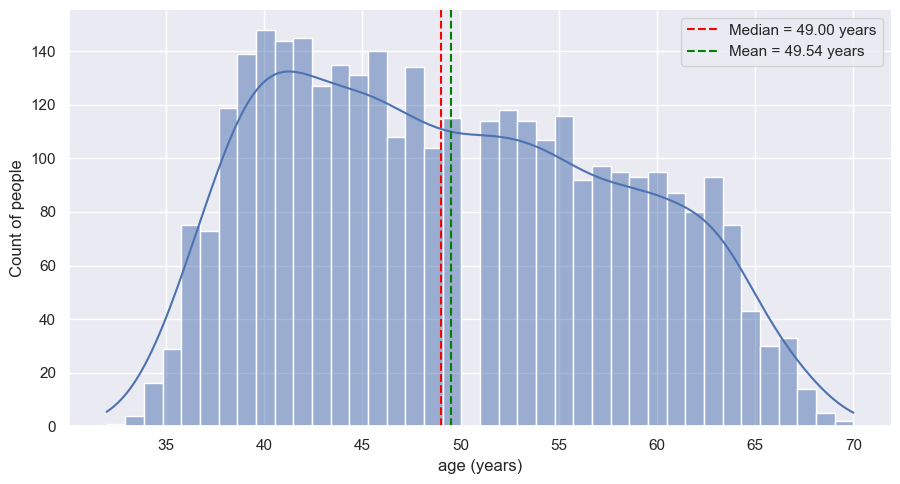

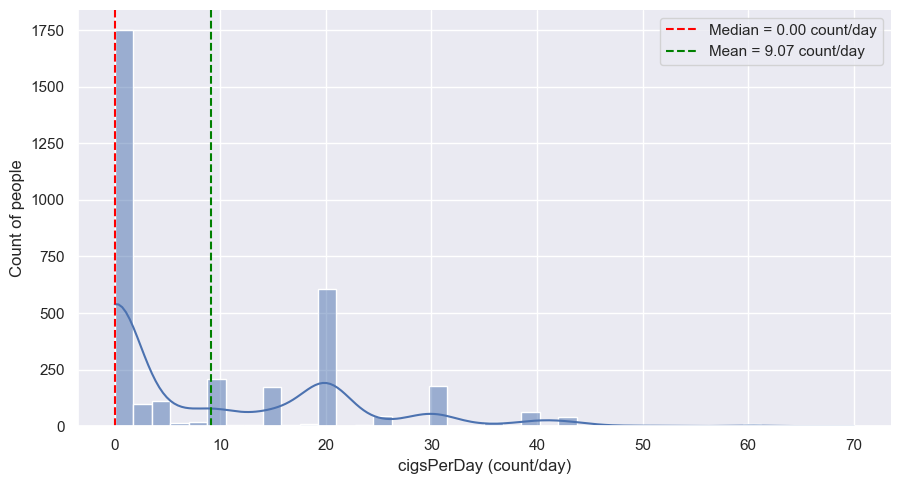

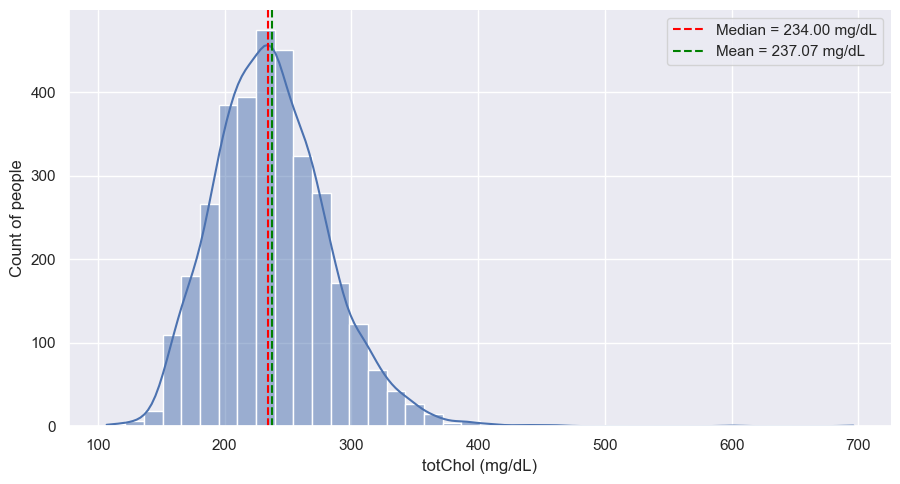

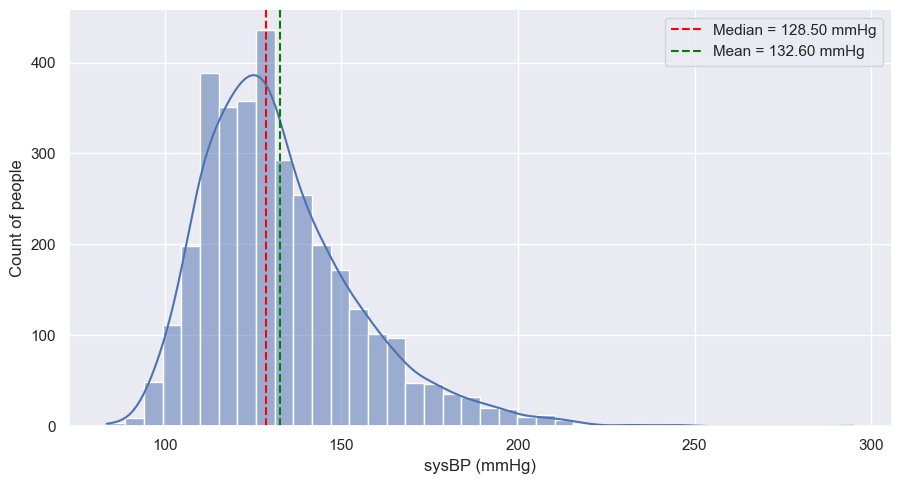

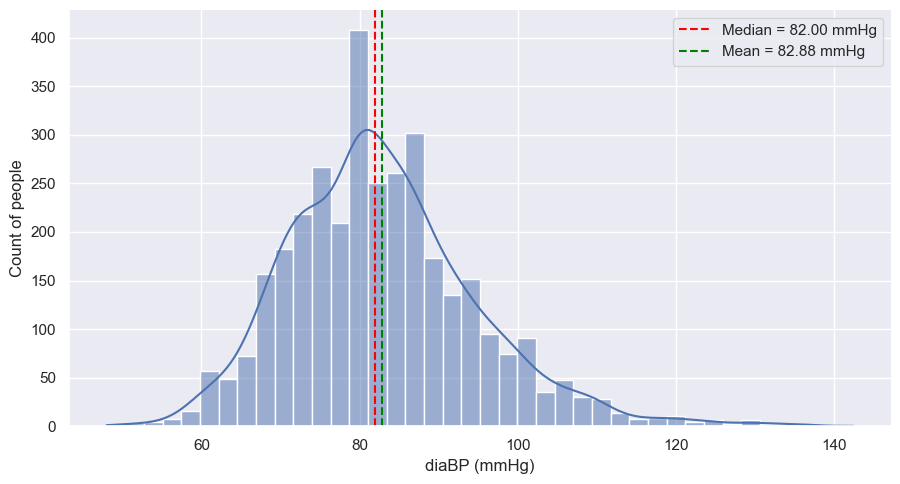

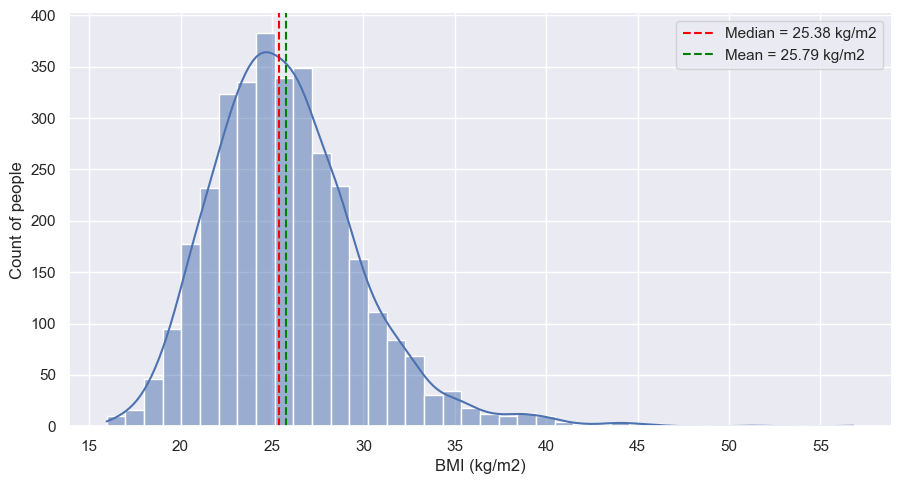

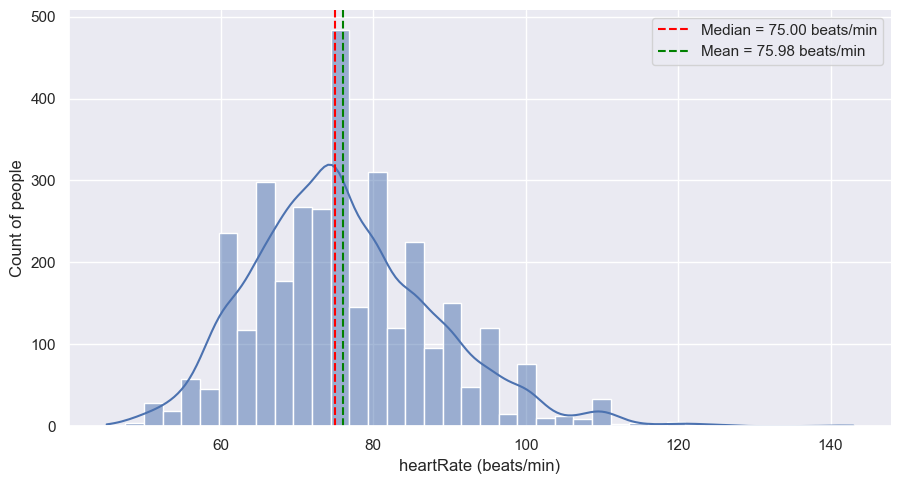

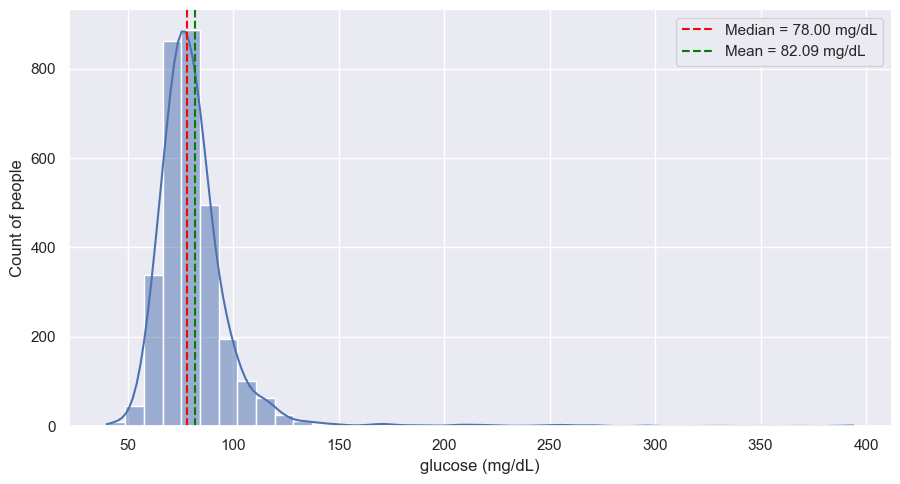

In [18]:
#Plotting the continuous variable distribution with their median and mean
def displot_with_median(dataset, variable, median = False, mean = False, unit = None):
  
  sns.displot(dataset[variable], height = 5, aspect = 11/6, bins = 40, kde = True)
  if median == True:
    plt.axvline(dataset[variable].median(), color = 'red', linestyle = '--', label = f'Median = {dataset[variable].median():.2f} {unit}')
  if mean == True:
    plt.axvline(dataset[variable].mean(), color = 'green', linestyle = '--', label = f'Mean = {dataset[variable].mean():.2f} {unit}')
  plt.ylabel('Count of people')
  plt.xlabel(var + f' ({unit})')
  plt.legend()
  plt.show()


units = ['years', 'count/day', 'mg/dL', 'mmHg', 'mmHg', 'kg/m2', 'beats/min', 'mg/dL']
cont_var_units = dict(zip(cont_vars, units))


for var in cont_var_units:
  displot_with_median(df, var, median = True, mean = True, unit = cont_var_units[var])

In [19]:
# Defining a function for categorical plot with median
def catplot_with_median(dataset, variable, legend, median = False, unit = None, kind_ = 'violin'):
  ''' Returns a categorical plot with median. Inputs: Dataframe dataset, continuous variable to plot,
  the discrete variable to legend on, median (True/False), unit and type of plot'''

  sns.catplot(data = dataset, x = legend, y = variable, height = 5, aspect = 11/6, kind = kind_)
  plt.ylabel(variable + f' ({unit})')
  if median == True:
    colour = ['green', 'red', 'yellow', 'pink']
    i = 0
    for value in dataset.dropna()[legend].unique():
      plt.axhline(dataset[dataset[legend] == value][variable].median(), color = colour[i], linestyle = '--', label = f"Median ({legend} = {value}) = {dataset[dataset[legend] == value][variable].median():.2f} {unit}")
      i+=1
    plt.legend(bbox_to_anchor=(1, 0.54))
  plt.show()

In [33]:
# Defining a function to annotate the data values in the graph
def display_vals(axis, round_ = 2):
  '''Displays the data value on the chart'''
  for p in axis.patches:
   axis.annotate(str(round(p.get_height(), round_)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
     

# Hypothesis test

In [20]:
#Hypothetical Statement - 1
# Performing the one-sample proportion tests
h_vals = {'F':0.44, 'M':0.50}
c = 1
for sex in h_vals:
  df_h1 = df[df['sex'] == sex]
  n_sex = df_h1.shape[0]
  n_sex_highbp = df_h1[(df_h1['sysBP'] >= 130) | (df_h1['diaBP'] >= 90)].shape[0]
  alpha = 0.05
  stat, p_value = proportions_ztest(count = n_sex_highbp, nobs = n_sex, value = h_vals[sex])
  x = 'Women' if sex == 'F' else 'Men'
  print(f'Hypothesis test {c}:')
  if p_value < alpha:
    print(f'P-value = {p_value} < {alpha}. The Null Hypothesis stands rejected. The true proportion of {x} having high Blood Pressure is greater than {h_vals[sex] * 100}%\n')
  else:
    print(f'P-value = {p_value} > {alpha}. The Null Hypothesis that the true proportion of {x} with high Blood pressure is {h_vals[sex] * 100}% is failed to be rejected')
  c+= 1

Hypothesis test 1:
P-value = 1.0893752912351863e-06 < 0.05. The Null Hypothesis stands rejected. The true proportion of Women having high Blood Pressure is greater than 44.0%

Hypothesis test 2:
P-value = 0.9375685699112782 > 0.05. The Null Hypothesis that the true proportion of Men with high Blood pressure is 50.0% is failed to be rejected


In [21]:
#Hypothetical Statement - 2
df_h2 = df[['sysBP', 'diaBP']]
df_h2['MAP'] = (df['sysBP'] + df['diaBP'] * 2)/3
h2_val = 96.667
alpha2 = 0.05

In [22]:
print(f"P-value for checking Normal distribution using shapiro test = {shapiro(df_h2['MAP'])[1]}")

P-value for checking Normal distribution using shapiro test = 1.2743282231275603e-30


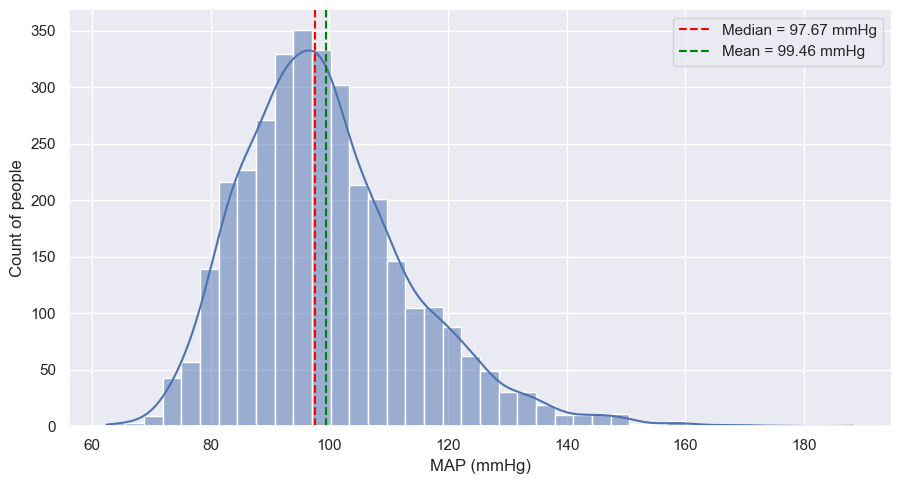

In [23]:
var = 'MAP'
displot_with_median(df_h2, var, median = True, mean = True, unit = 'mmHg')

In [24]:
p_value_h2 = ttest_1samp(a = df_h2['MAP'], popmean = 1/h2_val)[1]
if p_value_h2 < alpha2:
  print(f'P-value = {p_value_h2} < {alpha2}. The Null Hypothesis stands rejected. The true mean of Mean Arterial Pressure is not equal to the optimum {h2_val}mmHg')
else:
  print(f'P-value = {p_value_h2} > {alpha2}. The Null Hypothesis that the true mean of Mean Arterial Pressure is equal to {h2_val}mmHg is failed to be rejected')
     

P-value = 0.0 < 0.05. The Null Hypothesis stands rejected. The true mean of Mean Arterial Pressure is not equal to the optimum 96.667mmHg


In [25]:
#Hypothetical Statement - 3
df_h3 = df[categ_vars].dropna()
alpha3 = 0.01

In [26]:
# Converting 'sex' and 'is_smoking' columns to int for the Hypothesis tests
df_h3['sex'] = df_h3['sex'].map({'M':1, 'F':0})
df_h3['is_smoking'] = df_h3['is_smoking'].map({'YES':1, 'NO':0})

In [31]:
# Performing the chi2 test of each categorical variable with 'TenYearCHD'
p_vals = chi2(df_h3, df.loc[df_h3.index, 'TenYearCHD'])[1]

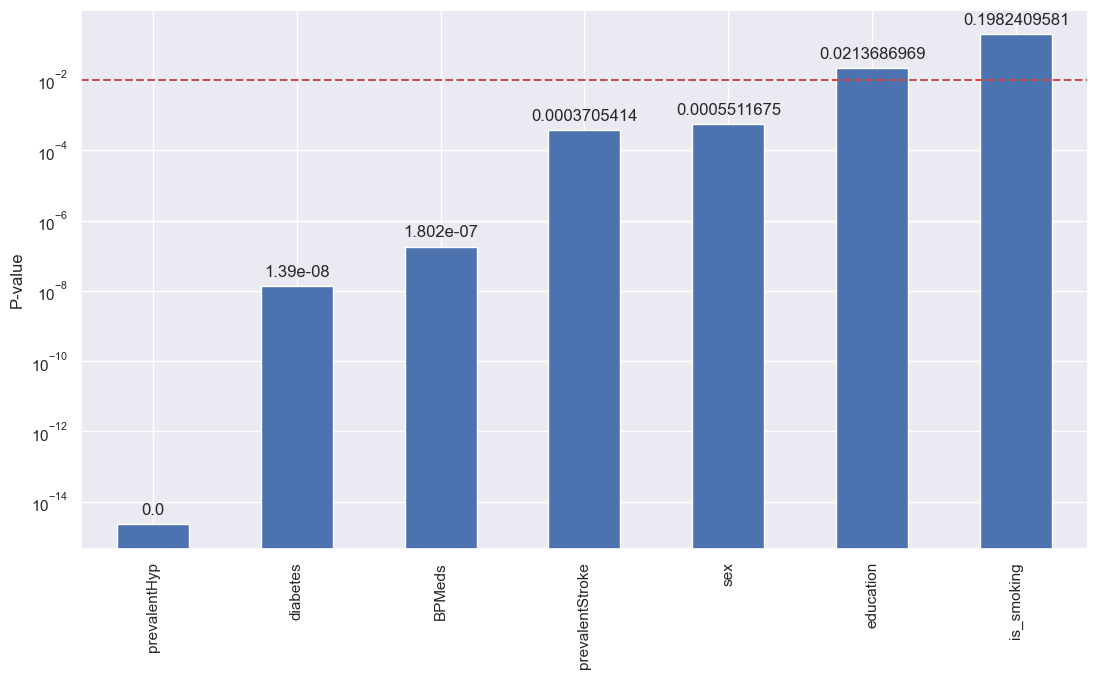

In [34]:
# Plotting the p_values for each categorical variable
categ_score_df = pd.DataFrame(p_vals, categ_vars).sort_values(0)
ax = categ_score_df.plot(kind = 'bar', figsize = (13, 7))
ax.legend_.remove()
ax.set(yscale = 'log', ylabel = 'P-value')
plt.axhline(alpha3, color = 'r', linestyle = '--')
display_vals(ax, 10)
plt.show()

In [35]:
for row, index in categ_score_df.iterrows():
  p_value = index.values[0]
  if p_value > alpha3:
    print(f"For {row} variable, P-value = {p_value} > {alpha3}. The Null Hypothesis is failed to be rejected\n")
  else:
    print(f"For {row} variable, P-value = {p_value} < {alpha3}. The Null Hypothesis is rejected\n")

For prevalentHyp variable, P-value = 2.269535671617059e-15 < 0.01. The Null Hypothesis is rejected

For diabetes variable, P-value = 1.385222935121762e-08 < 0.01. The Null Hypothesis is rejected

For BPMeds variable, P-value = 1.8018548283688946e-07 < 0.01. The Null Hypothesis is rejected

For prevalentStroke variable, P-value = 0.0003705414422451561 < 0.01. The Null Hypothesis is rejected

For sex variable, P-value = 0.000551167492518658 < 0.01. The Null Hypothesis is rejected

For education variable, P-value = 0.02136869691789055 > 0.01. The Null Hypothesis is failed to be rejected

For is_smoking variable, P-value = 0.19824095808668835 > 0.01. The Null Hypothesis is failed to be rejected



# Missing values

In [36]:
#creating copy of data 
data = df.copy()

In [37]:
# Defining a function to annotate the data values in the graph
def display_vals(axis, round_ = 2):
    
  for p in axis.patches:
   axis.annotate(str(round(p.get_height(), round_)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
     


There is a total of 510 missing values in the dataset. They are distributed among the variables as follows



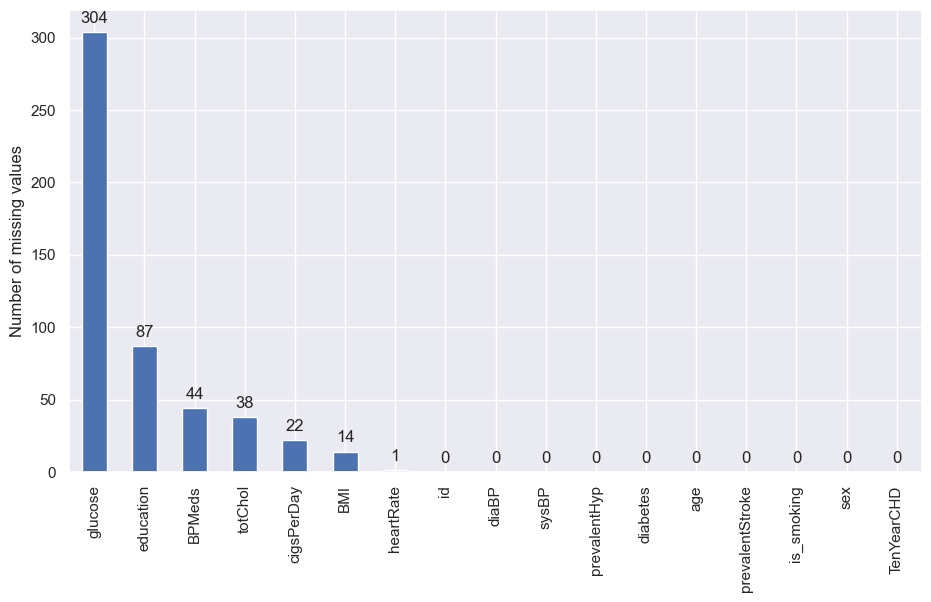

In [38]:
print(f'There is a total of {df.isna().sum().sum()} missing values in the dataset. They are distributed among the variables as follows\n')

# Visualising the number of missing values in each variable
plt.figure(figsize = (11, 6))
ax = data.isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)

In [39]:
data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

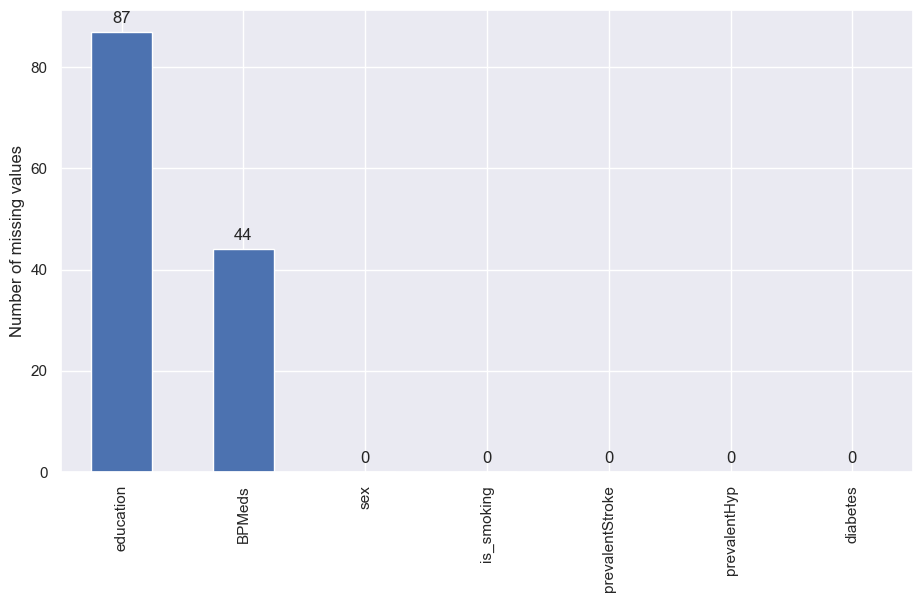

In [40]:
plt.figure(figsize = (11, 6))
#only for categ_vars
ax = data[categ_vars].isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)

In [41]:
#removing education for dataset
categ_vars.remove('education')

In [42]:
categ_vars

['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [43]:
#bpmeds index for missing values 
bpmeds_missing = data[data['BPMeds'].isna()].index

BP medications are recommended by doctors to the following patients:

 Having systolic and diastolic Blood Pressure levels above 140/90 mmHg.
 
 For those having diabetes or kidney diseases, having Blood pressure levels above 130/80 mmHg

Hence, the missing values in BPMeds, which are not large in number (1.2% of dataset), are filled with the above rules

In [44]:
bpmeds_missing

Int64Index([   8,  102,  128,  174,  194,  265,  304,  656,  863,  864,  881,
             923,  957, 1069, 1148, 1288, 1367, 1374, 1529, 1700, 1769, 1794,
            1858, 1862, 1918, 1919, 1955, 2044, 2057, 2159, 2244, 2435, 2453,
            2540, 2644, 2659, 2906, 2940, 2956, 3013, 3120, 3201, 3281, 3388],
           dtype='int64')

In [45]:
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [46]:
# Filling the BPMeds missing values as according to above
for index in bpmeds_missing:
  # For diabetic patients
  if data.loc[index, 'diabetes'] == 1 and (data.loc[index, 'sysBP'] > 130 or data.loc[index, 'diaBP'] > 80):
    data.loc[index, 'BPMeds'] = 1
  
  # For non-diabetic patients
  elif data.loc[index, 'diabetes'] == 0 and (data.loc[index, 'sysBP'] > 140 or data.loc[index, 'diaBP'] > 90):
    data.loc[index, 'BPMeds'] = 1
  
  # For rest of the patients
  else:
    data.loc[index, 'BPMeds'] = 0

In [47]:
data[categ_vars].isna().sum()

sex                0
is_smoking         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
dtype: int64

categorical missing has been removed 

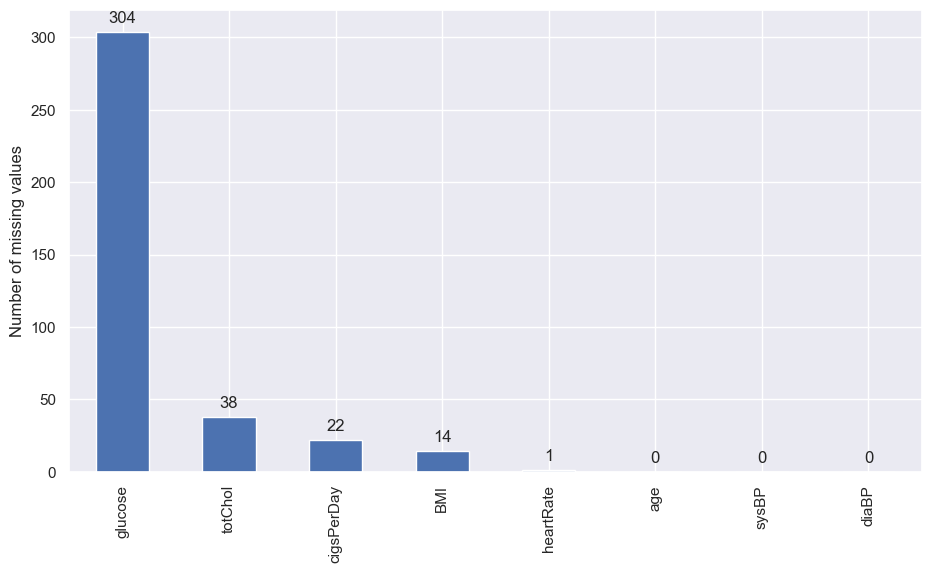

In [48]:
plt.figure(figsize = (11, 6))
ax = data[cont_vars].isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)

In [49]:
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [50]:
#cigsPerDay
# Checking unique values for cigsPerDay when is_smoking = "NO"
data[data['is_smoking'] == 'NO']['cigsPerDay'].value_counts()

0.0    1703
Name: cigsPerDay, dtype: int64

In [51]:
# Checking unique values for cigsPerDay when is_smoking = "YES"
data[data['is_smoking'] == 'YES']['cigsPerDay'].value_counts().sort_index().head(5)

1.0     48
2.0     17
3.0     79
4.0      7
5.0    103
Name: cigsPerDay, dtype: int64

In [52]:
#checking value for is_smoking wherever cigsPerDay has a missing value 
data[data['cigsPerDay'].isna()]['is_smoking'].value_counts()

YES    22
Name: is_smoking, dtype: int64

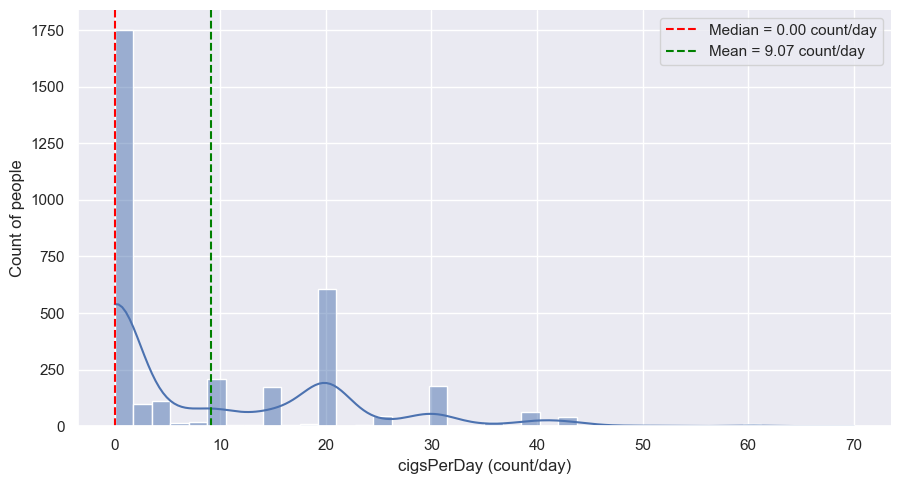

In [53]:
# Checking the distribution
var = 'cigsPerDay'
displot_with_median(data, var, median = True, mean = True, unit = cont_var_units[var])
     

wherever is_smoking = 'NO', the value of cigsPerDay is always 0. cigsPerDay is never zero when is_smoking = 'YES'

All the people where cigsPerDay has a missing value are current smokers (i.e., is_smoking == 'YES')

Distribution of cigsPerDay is extremely left skewed with a median of 0, indicating highest amount of non-smokers in the dataset

[Text(0, 0.5, 'cigsPerDay'), Text(0.5, 0, 'count/day')]

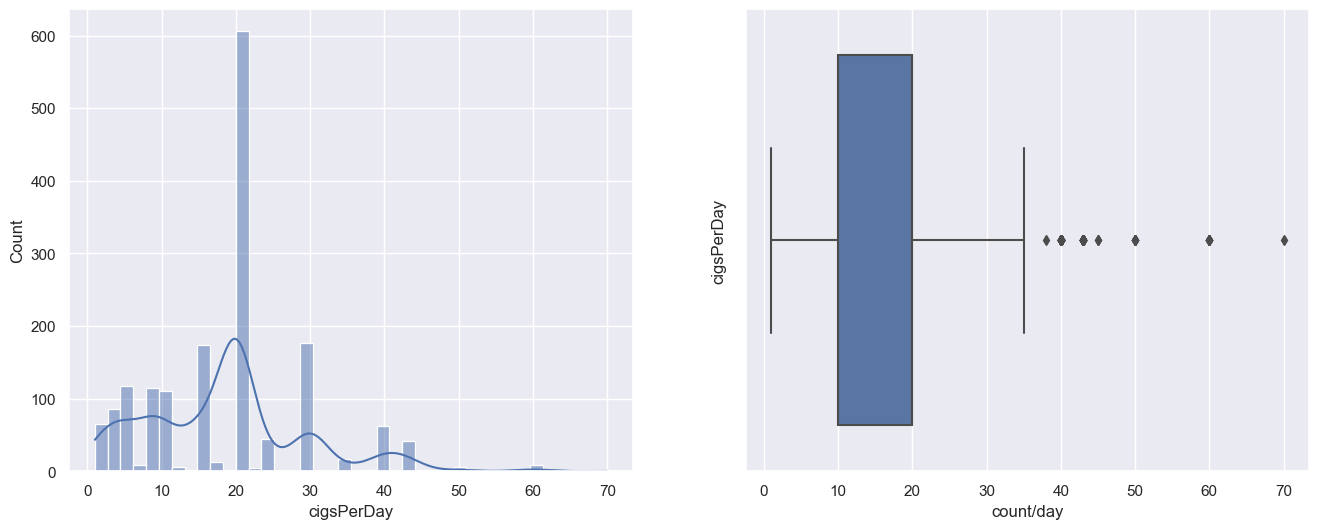

In [54]:
# Checking distribution and outliers for only smokers
var = 'cigsPerDay'
fig, axx = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
sns.histplot(data[data['is_smoking'] == 'YES'][var], bins = 40, kde = True, ax = axx[0])
sns.boxplot(data[data['is_smoking'] == 'YES'], x = var, orient = 'h', ax = axx[1])
axx[1].set(ylabel = var, xlabel = cont_var_units[var])

In [55]:
#imputing with median for current smoker 
imputing_median1 = data[data['is_smoking'] == 'YES']['cigsPerDay'].median()
data['cigsPerDay'] = data['cigsPerDay'].fillna(imputing_median1)

In [56]:
data['cigsPerDay'].isna().sum()

0

In [57]:
data

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     1.0   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

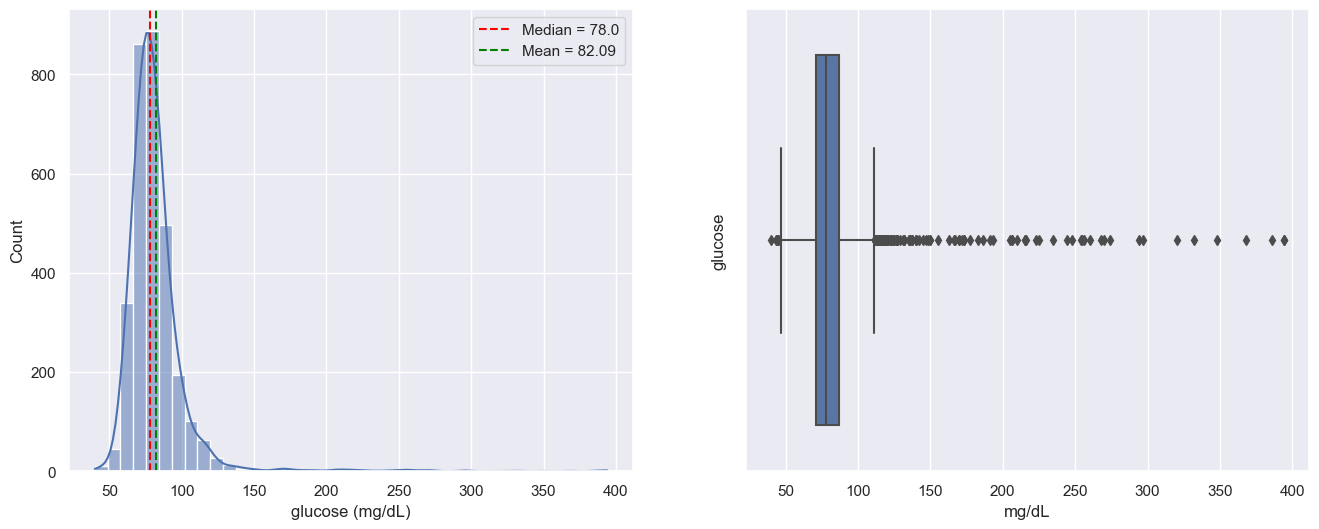

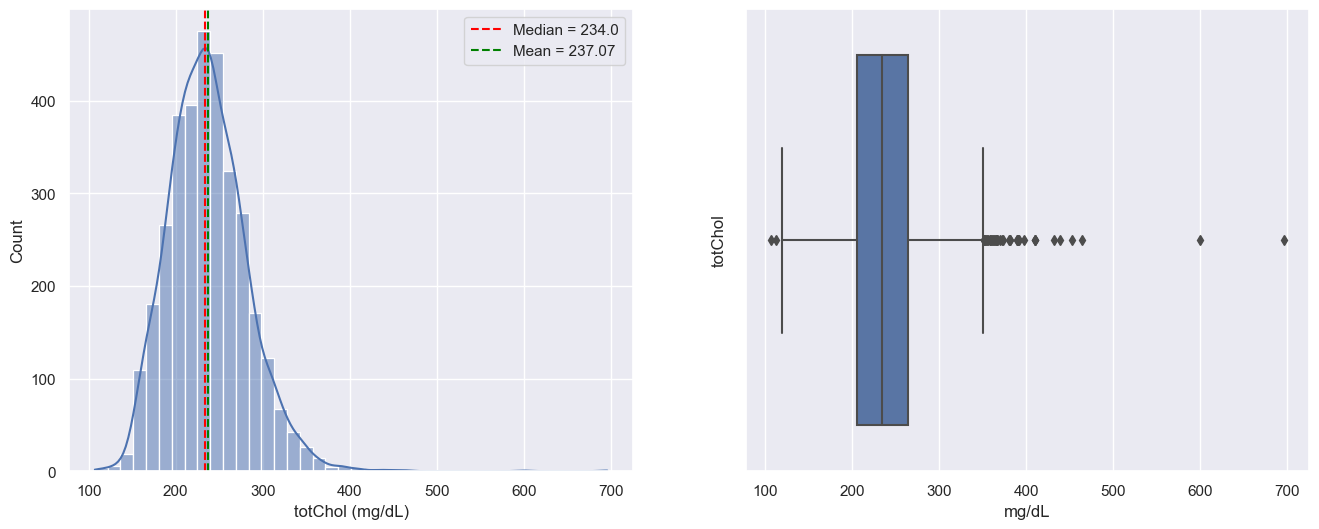

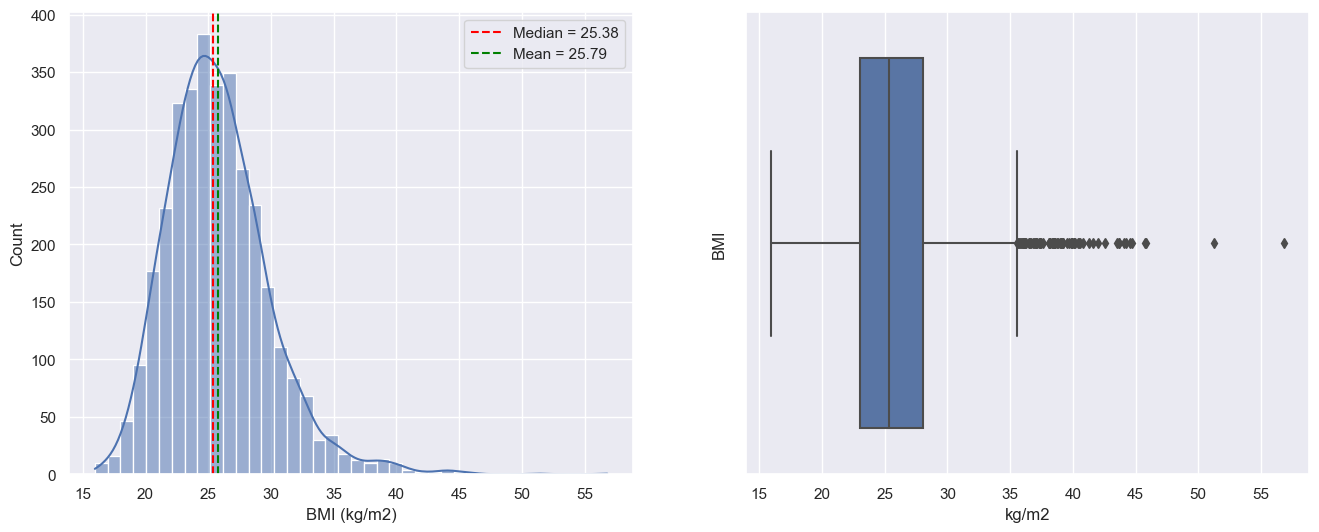

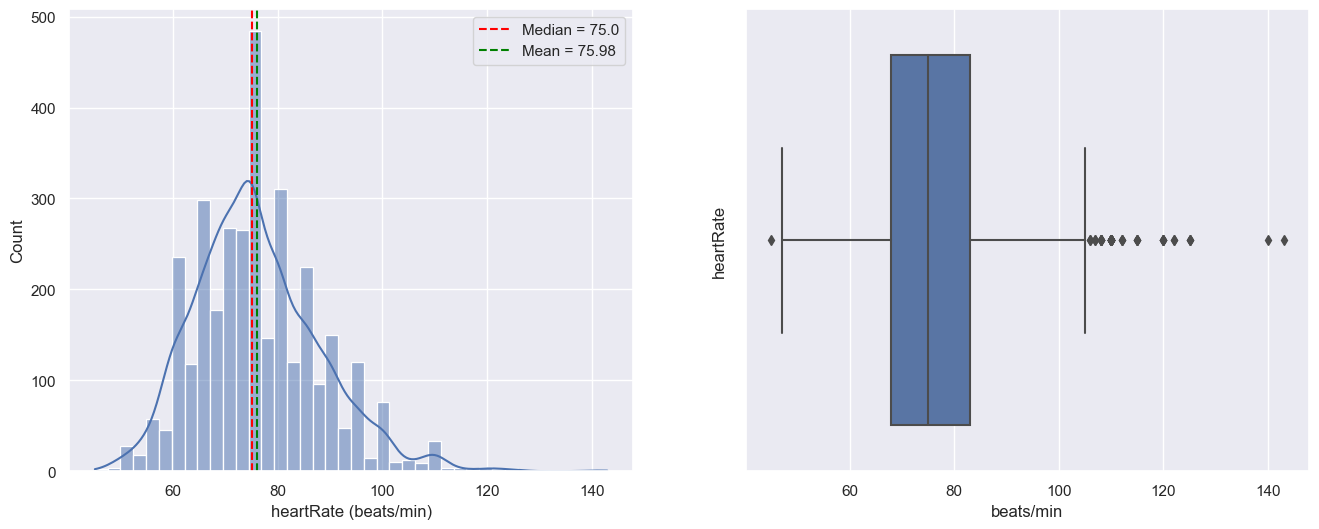

In [58]:
#distribution and outliners
for var in ['glucose', 'totChol', 'BMI', 'heartRate']:
  fig, axx = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
  sns.histplot(data[var], bins = 40, kde = True, ax = axx[0])
  axx[0].axvline(df[var].median(), color = 'red', linestyle = '--', label = f'Median = {round(df[var].median(), 2)}')
  axx[0].axvline(df[var].mean(), color = 'green', linestyle = '--', label = f'Mean = {round(df[var].mean(), 2)}')
  axx[0].set(xlabel = var + f' ({cont_var_units[var]})')
  axx[0].legend()
  sns.boxplot(data, x = var, orient = 'h', ax = axx[1])
  axx[1].set(ylabel = var, xlabel = cont_var_units[var])

In [59]:
# Imputing the missing values with the median for each variable
for var in ['glucose', 'totChol', 'BMI', 'heartRate']:
  imputing_median = data[var].median()
  data[var]  = data[var].fillna(imputing_median)

In [60]:
data.isna().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

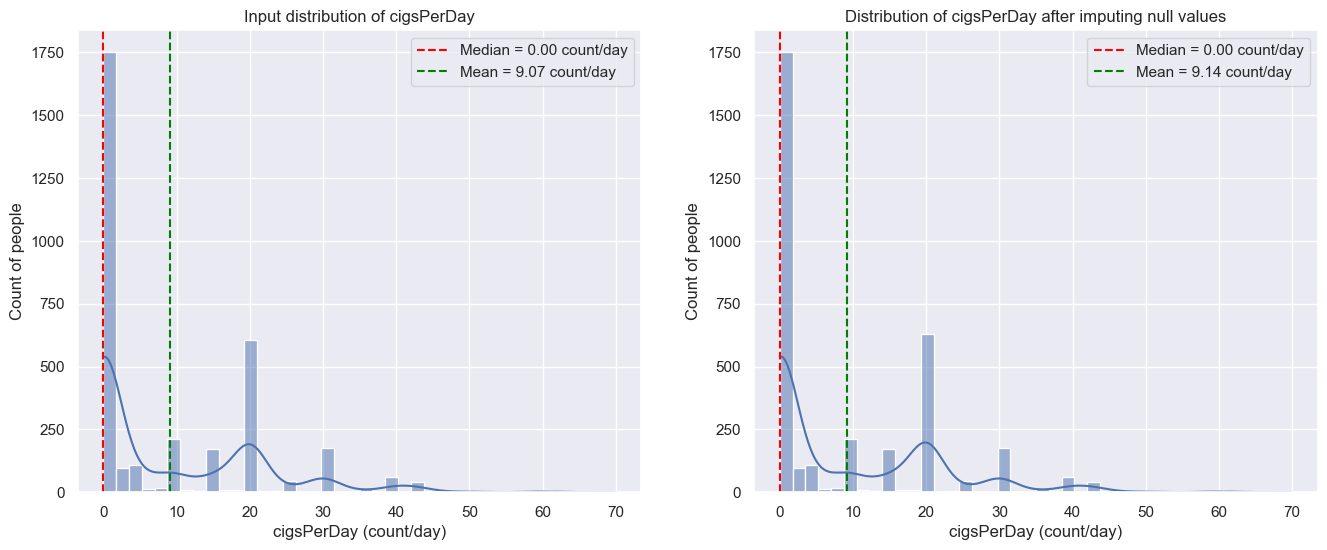

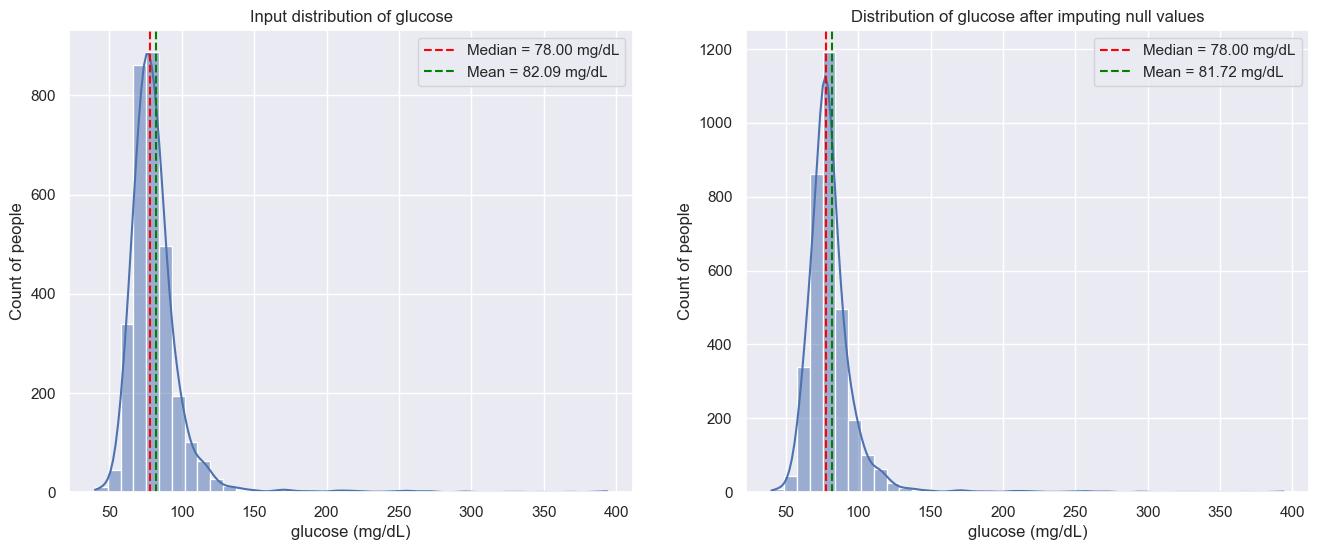

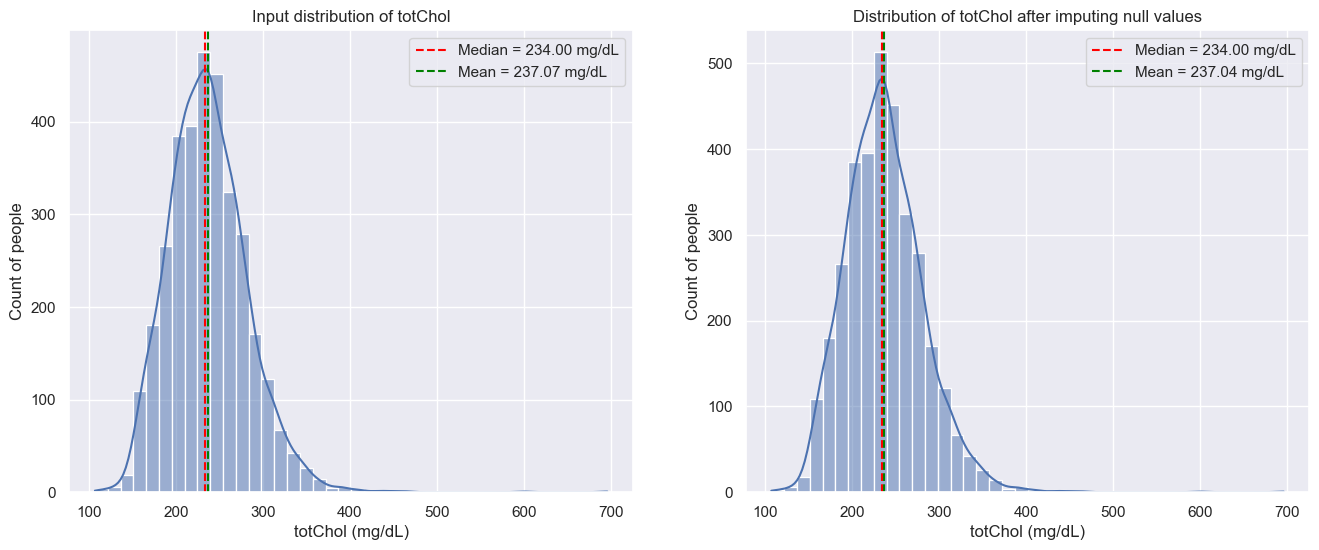

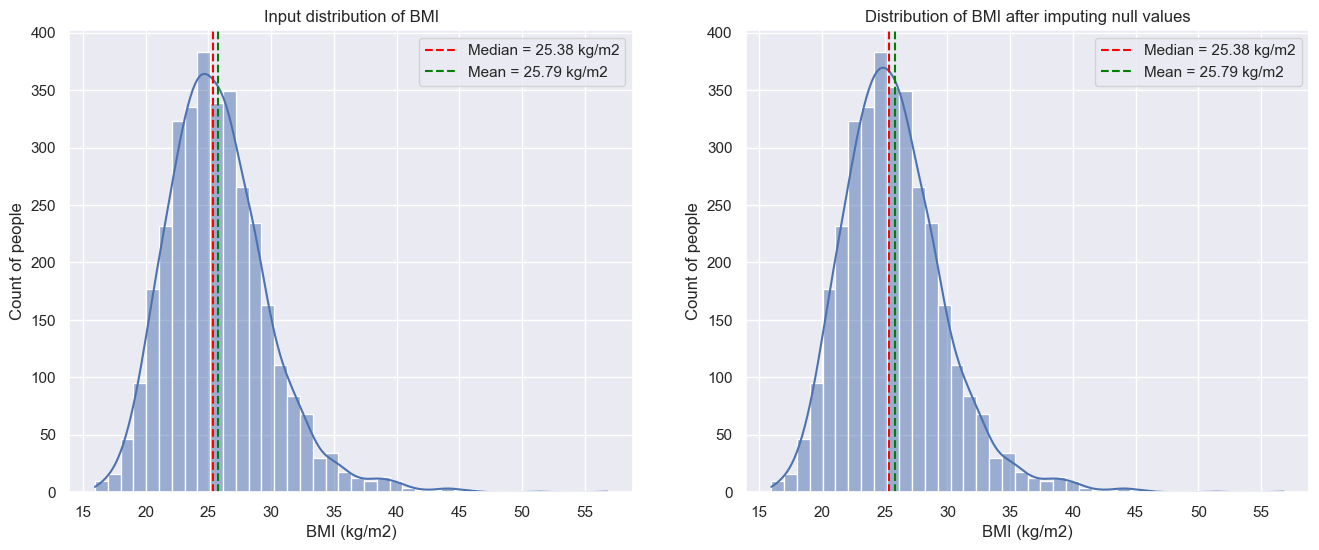

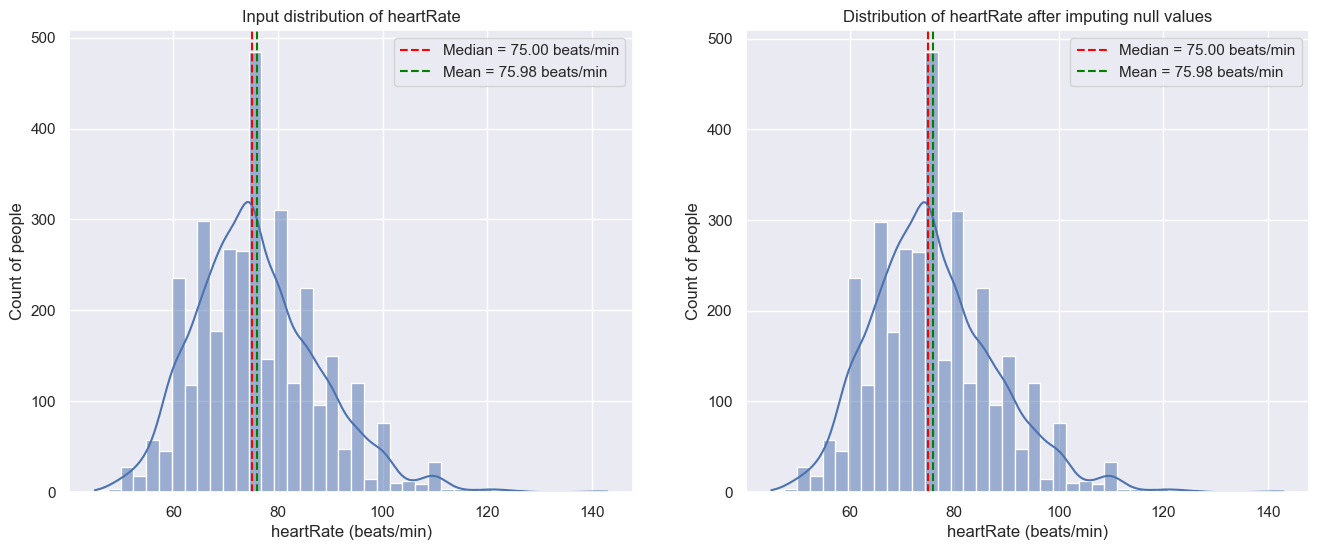

In [61]:
#mean, median and distribution after imputing missing values 
for var in ['cigsPerDay', 'glucose', 'totChol', 'BMI', 'heartRate']:
  fig, axx = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
  sns.histplot(df[var], bins = 40, kde = True, ax = axx[0])
  sns.histplot(data[var], bins = 40, kde = True, ax = axx[1])
  for i, datas in enumerate([df, data]):
    axx[i].axvline(datas[var].median(), color = 'red', linestyle = '--', label = f'Median = {datas[var].median():.2f} {cont_var_units[var]}')
    axx[i].axvline(datas[var].mean(), color = 'green', linestyle = '--', label = f'Mean = {datas[var].mean():.2f} {cont_var_units[var]}')
    axx[i].set(xlabel = var + f' ({cont_var_units[var]})', ylabel = 'Count of people')
    axx[i].legend()
  axx[0].set(title = f'Input distribution of {var}')
  axx[1].set(title = f'Distribution of {var} after imputing null values')
  plt.legend()
  plt.show()

Feature Manipulation and Selection

Before analysing outliers, certain features need to be handled to reduce dimensionality and/or improve multicollinearity. In this section, the redundant variables are removed and features with high correlation (like sysBP-diaBP and diabetes-glucose as shown below) are dealt with

In [62]:
def colorise(val, threshold, equality = 'greater', font = None, absolute = False):
  '''Function to conditionally format the fonts:
  Inputs - value to compare, threshold value, equality (greater or lesser), font color and absolute (Boolean)'''
  
  if absolute == True:
    val = abs(val)
  if equality == 'lesser':
    threshold*= -1
    val*= -1
  if val > threshold and val != 1:
    return f'color : {font}; font-weight : bold'

In [63]:
df[['BMI', 'sysBP', 'diaBP', 'education', 'TenYearCHD']].corr().style.applymap(colorise, threshold = -0.1, equality = 'lesser', font = 'red')
  

In [64]:
# Checking the correlation between variables
data.corr().style.applymap(colorise, threshold = 0.6, equality = 'greater', font = 'red')

In [65]:
# Removing education and is_smoking from data
data = data.drop(['education', 'is_smoking'], axis = 1)


prevalentStroke is removed because of the high class imbalance - only 0.5% of the dataset having one class, as shown below

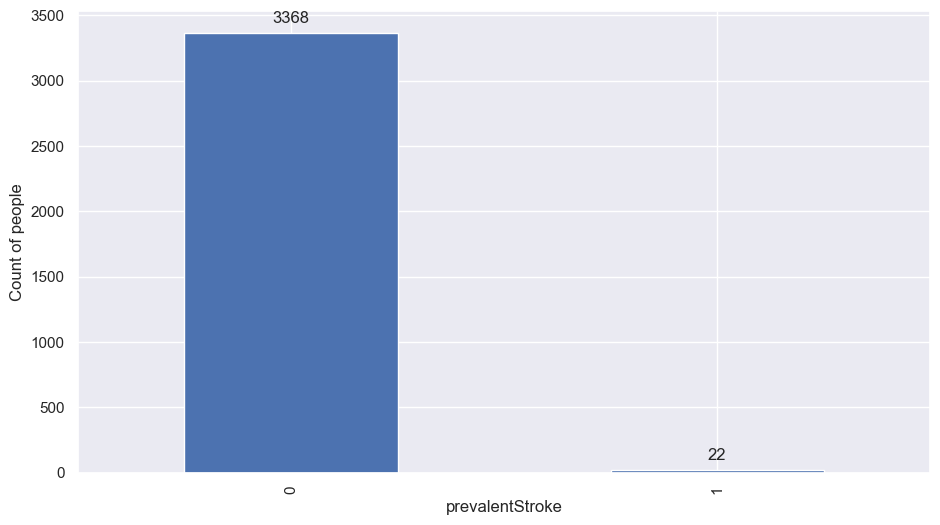

In [66]:
var = 'prevalentStroke'
plt.figure(figsize = (11, 6))
ax = data[var].value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel(var)
display_vals(ax)

 Systolic BP and Diastolic BP
 
 To address the high multicollinearity between systolic Blood Pressure and Diastolic Blood pressure, the two are combined to form another continuous variable named 'Mean Arterial Pressure'.

In [67]:
data['MAP'] = (data['sysBP'] + 2*data['diaBP'])/3

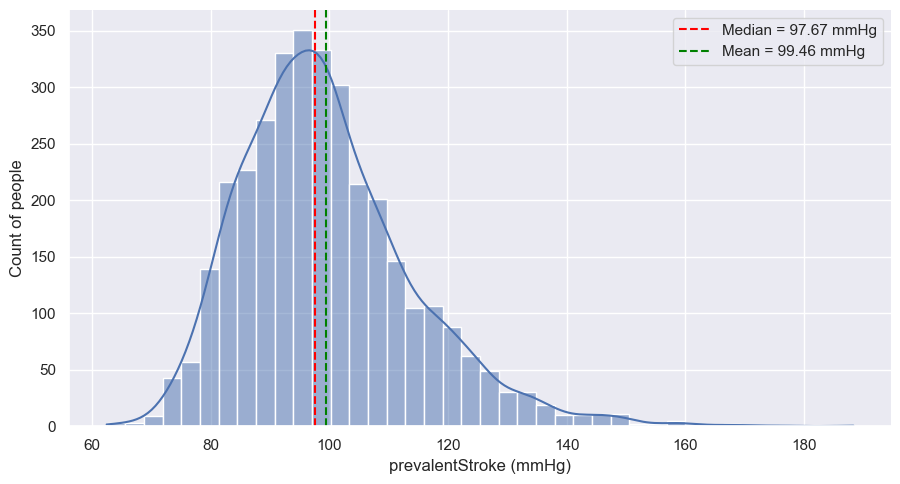

In [68]:
# Checking the distribution
displot_with_median(dataset = data, variable = 'MAP', median = True, mean = True, unit = 'mmHg')

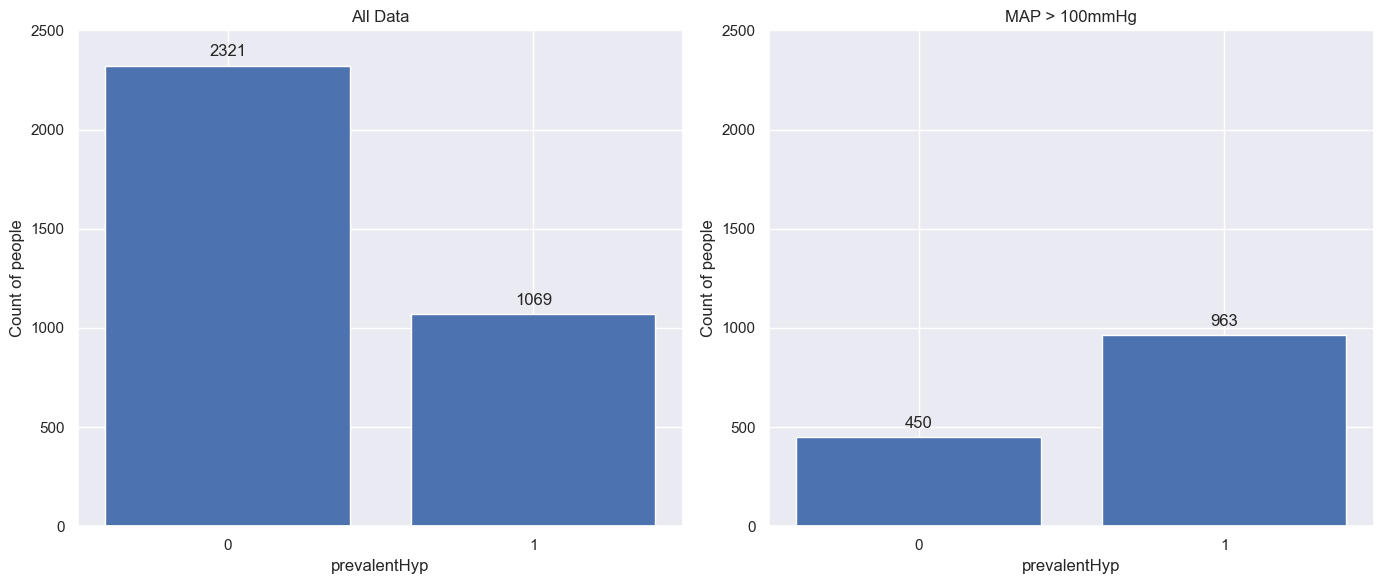

In [69]:
# Checking distribution of prevalentHyp

filter_counts = data[data['MAP'] > 100]['prevalentHyp'].value_counts().sort_index()
all_counts = data['prevalentHyp'].value_counts().sort_index()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].bar(all_counts.index, all_counts.values)
ax[0].set_title('All Data')
ax[1].bar(filter_counts.index, filter_counts.values)
ax[1].set_title('MAP > 100mmHg')
for i in range(2):
  ax[i].set(xticks = [0, 1], ylim = [0, 2500], ylabel = 'Count of people', xlabel = 'prevalentHyp')
  display_vals(ax[i])
plt.tight_layout()
plt.show()

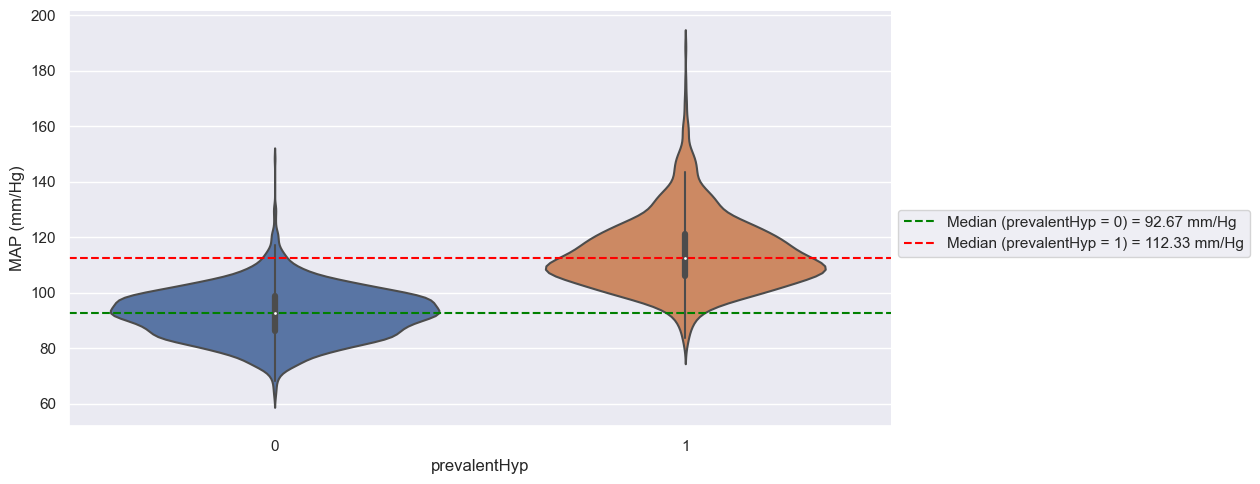

In [70]:
catplot_with_median(dataset = data, variable = 'MAP', legend = 'prevalentHyp', median = True, unit = 'mm/Hg')

A Mean arterial pressure over 100mmHg is considered high pressure in the arteries, and indicates Hypertension. As can be observed from above graph, a vast majority of the patients (over 90%) with history of Hypertension have an MAP above 100mmHg

This is reflected in the high correlation between prevalentHyp and MAP. Hence, prevalentHyp is deemed redundant and dropped from the analysis

# Glucose and Diabetes
Glucose and diabetes are directly linked to each other in that, high levels of glucose indicate high likelihood of diabetes. While there are other factors which cause elevated glucose levels even for non-diabetic patients, like stress, certain medications, and some medical conditions, it is not common.

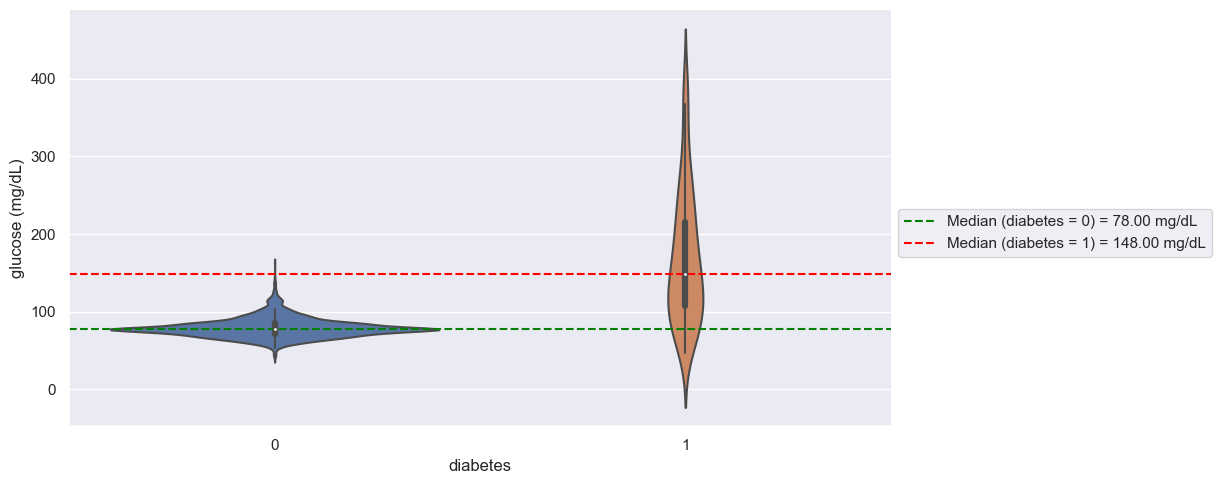

In [71]:
catplot_with_median(dataset = data, variable = 'glucose', legend = 'diabetes', median = True, unit = 'mg/dL')

As it can be seen, high glucose levels pertain to diabetic patients, which can be observed in the highly flattened out plot; while most of the non-diabetic patients have an optimum glucose level, as is expected. Hence, diabetes category can be dropped as it is redundant information and also because of the high correlation with glucose

In [72]:
# Defining the function for Diabetes grades
def diabetes_grades(df):
  if df['glucose'] >= 126:
    return 4 #Diabetes
  elif df['glucose'] > 100:
    return 3 #Pre-diabetes
  elif df['glucose'] > 70:
    return 2 #Normal
  elif df['glucose'] < 71:
    return 1 #Hypoglycemia

In [73]:
data['diabetes_grade'] = data.apply(diabetes_grades, axis = 1)

In [74]:
data

id  age sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0        0   64   F         3.0     0.0                0             0   
1        1   36   M         0.0     0.0                0             1   
2        2   46   F        10.0     0.0                0             0   
3        3   50   M        20.0     0.0                0             1   
4        4   64   F        30.0     0.0                0             0   
...    ...  ...  ..         ...     ...              ...           ...   
3385  3385   60   F         0.0     0.0                0             0   
3386  3386   46   F         0.0     0.0                0             0   
3387  3387   44   M         3.0     0.0                0             1   
3388  3388   60   M         0.0     1.0                0             1   
3389  3389   54   F         0.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  \
0            0    221.0  148.0   85.0  25.38       90.0     80.0           1   
1            0    212.0  168.0   98.0  29.77       72.0     75.0           0   
2            0    250.0  116.0   71.0  20.35       88.0     94.0           0   
3            0    233.0  158.0   88.0  28.26       68.0     94.0           1   
4            0    241.0  136.5   85.0  26.42       70.0     77.0           0   
...        ...      ...    ...    ...    ...        ...      ...         ...   
3385         0    261.0  123.5   79.0  29.28       70.0    103.0           0   
3386         0    199.0  102.0   56.0  21.96       80.0     84.0           0   
3387         0    352.0  164.0  119.0  28.92       73.0     72.0           1   
3388         0    191.0  167.0  105.0  23.01       80.0     85.0           0   
3389         0    288.0  124.0   77.0  29.88       79.0     92.0           0   

             MAP  diabetes_grade  
0     106.000000               2  
1     121.333333               2  
2      86.000000               2  
3     111.333333               2  
4     102.166667               2  
...          ...             ...  
3385   93.833333               3  
3386   71.333333               2  
3387  134.000000               2  
3388  125.666667               2  
3389   92.666667               2  

[3390 rows x 17 columns]

In [75]:
# Dropping the redundant columns
data = data.drop(['sysBP', 'diaBP', 'glucose', 'diabetes', 'prevalentHyp'], axis = 1)
cont_vars = [var for var in cont_vars if var not in ['sysBP', 'diaBP', 'glucose']]
cont_vars+=['MAP']
categ_vars = [var for var in categ_vars if var not in ['is_smoking', 'diabetes', 'prevalentStroke', 'prevalentHyp']]
categ_vars+=['diabetes_grade']

print(f'The categorical variables are: {categ_vars}')
print(f'The continuous variables are: {cont_vars}')

The categorical variables are: ['sex', 'BPMeds', 'diabetes_grade']
The continuous variables are: ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'MAP']


In [76]:
# Checking the correlation between variables
data.corr().style.applymap(colorise, threshold = 0.4, equality = 'greater', font = 'red')

As can be seen above, all multicollinearity has been removed even at a threshold of correlation = 0.4

In summary, this section consisted of:

dropping education, is_smoking and prevalentStroke
combining sysBP and diaBP to get MAP
modifying glucose to get diabetes_grade
dropping diabetes and prevaletHyp

# Handling Outliers

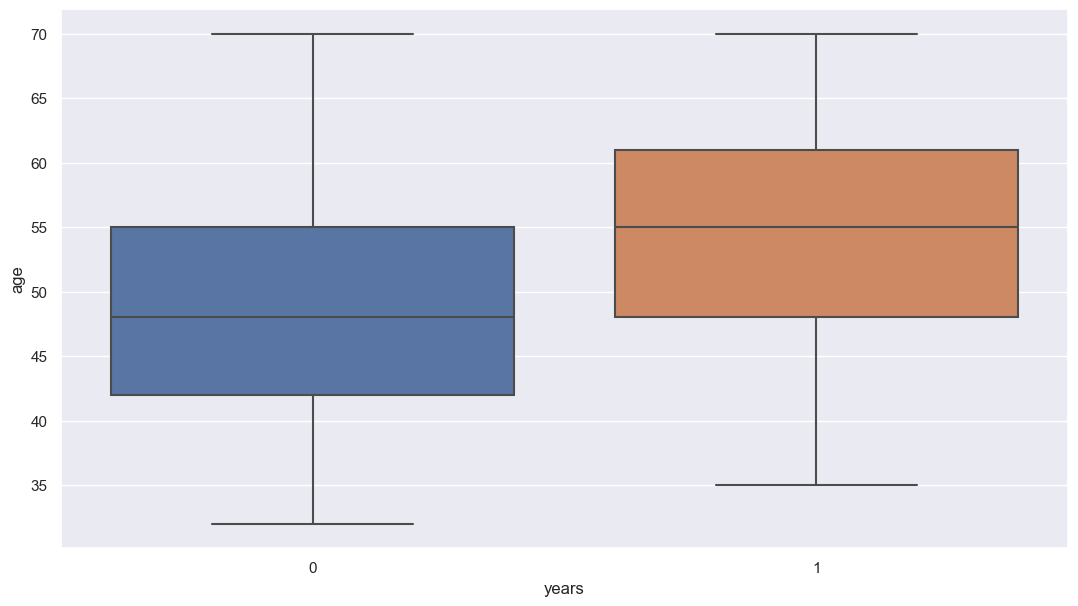

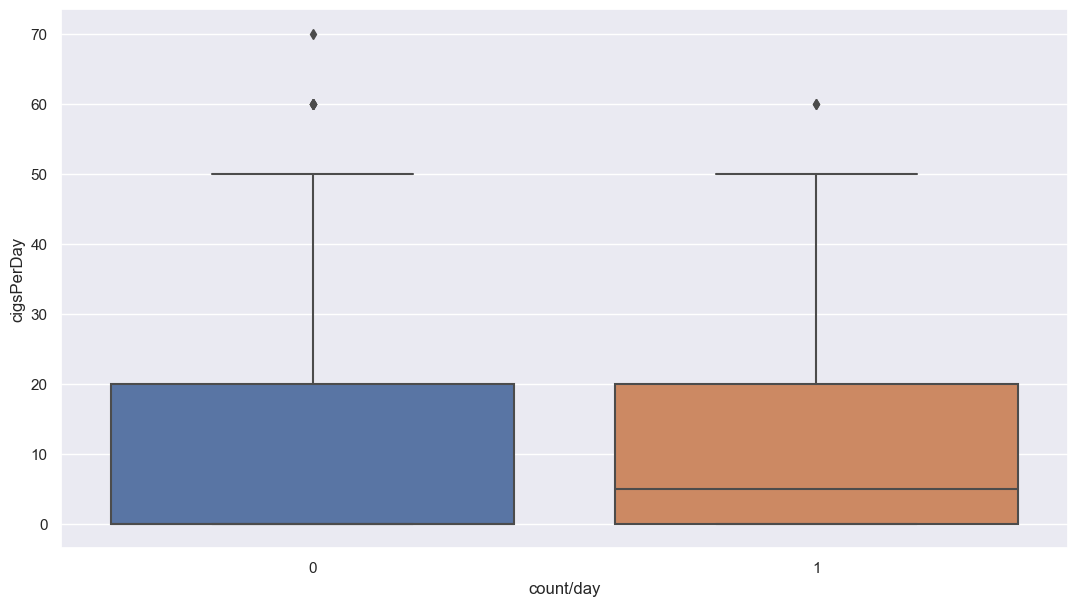

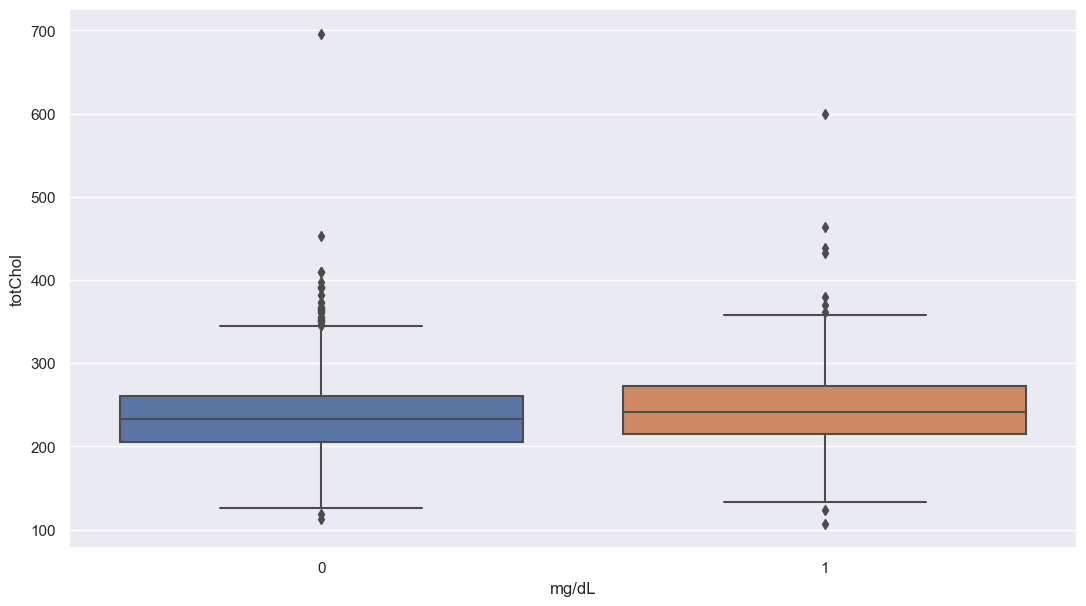

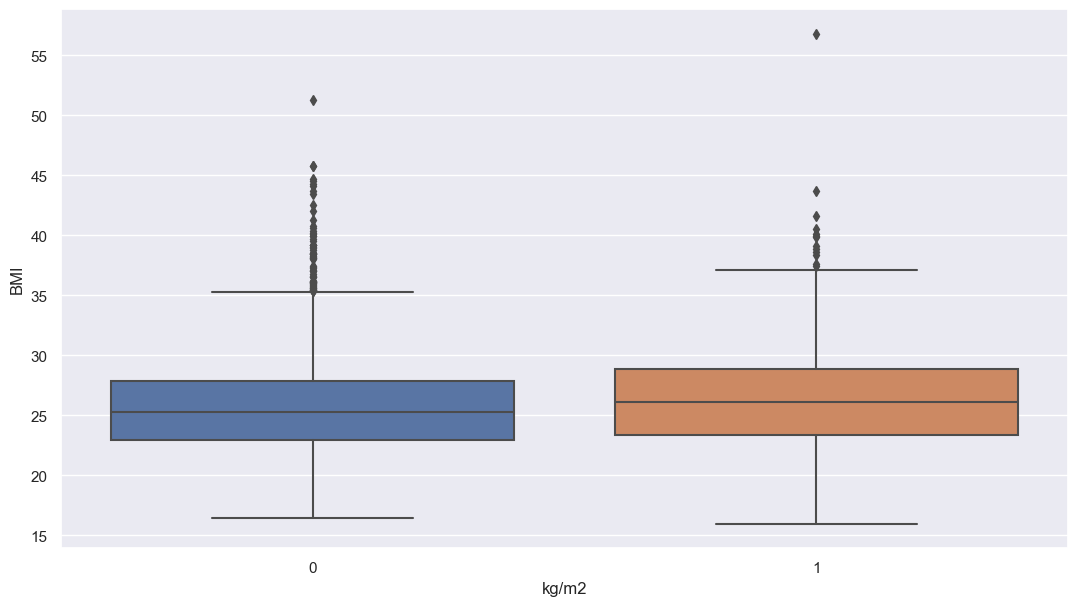

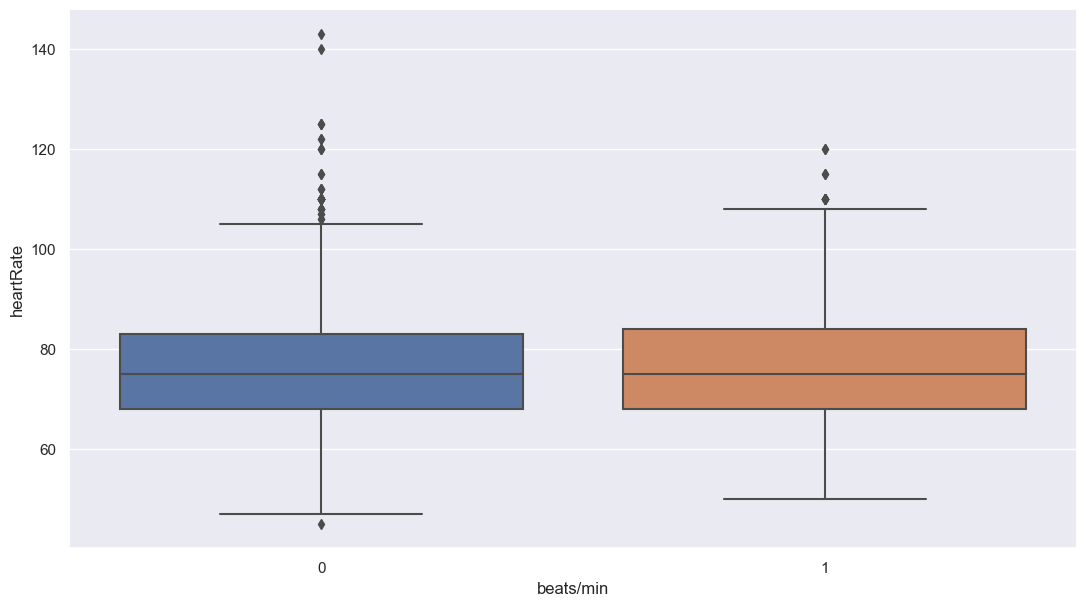

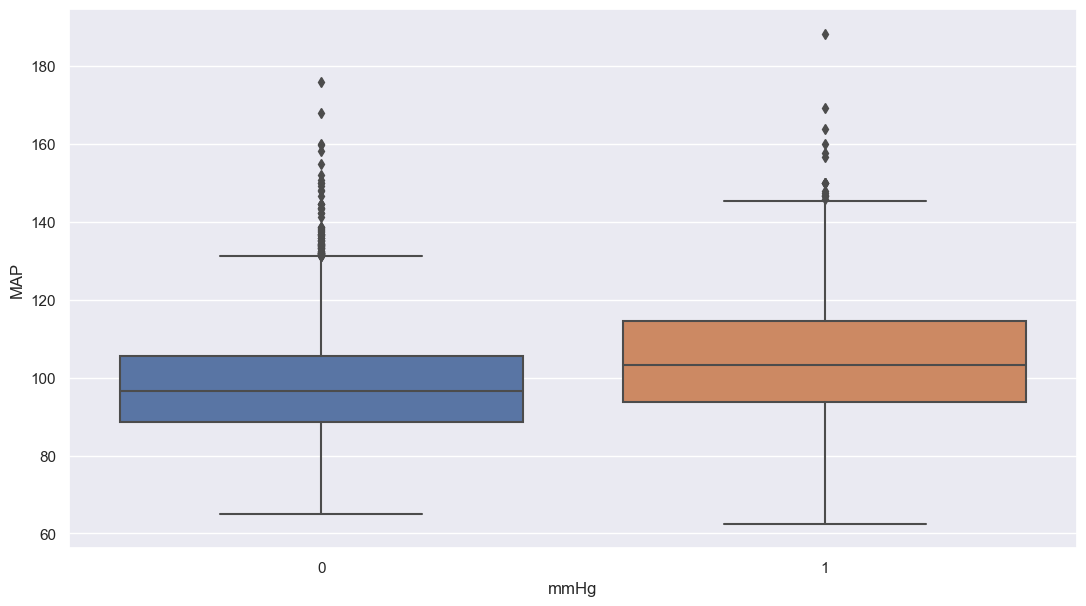

In [77]:
# Visualising the outliers
cont_var_units['MAP'] = 'mmHg'
for var in cont_vars:
  plt.figure(figsize = (13,7))
  sns.boxplot(data = data, y = var, x = 'TenYearCHD')
  plt.ylabel(var)
  plt.xlabel(cont_var_units[var])
  plt.show()

In [78]:
# Limitting maximum values
max_limits = [50, 500, 45, 120, 165]
outlier_vars = cont_vars[1:]
for var, limit in zip(outlier_vars, max_limits):
  data.loc[data[var] > limit, var] = limit

# Limitting the minimum value of heartRate
data.loc[data['heartRate'] < 50, 'heartRate'] = 50

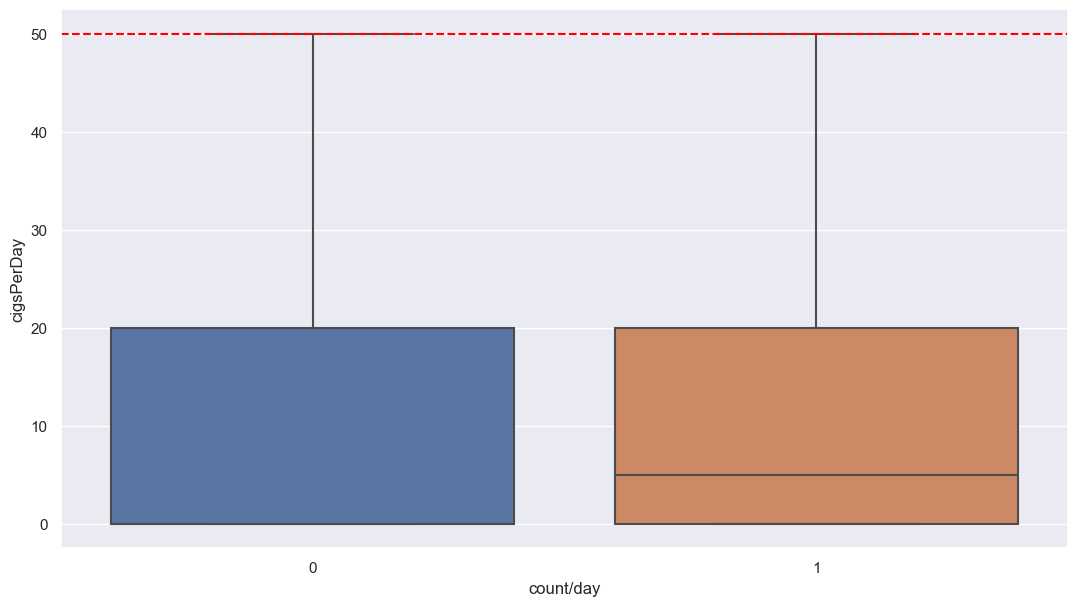

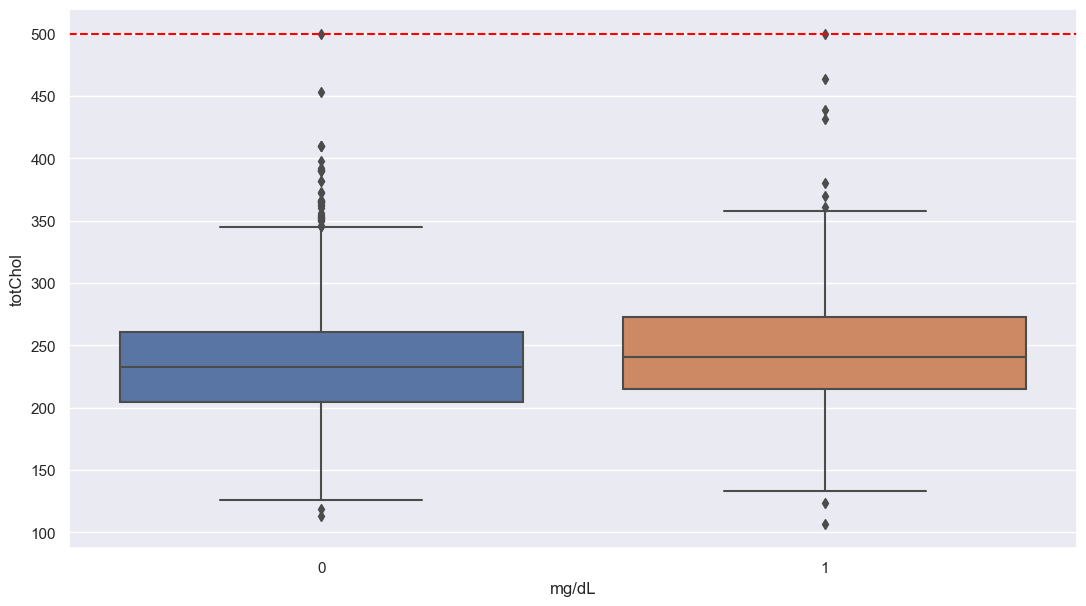

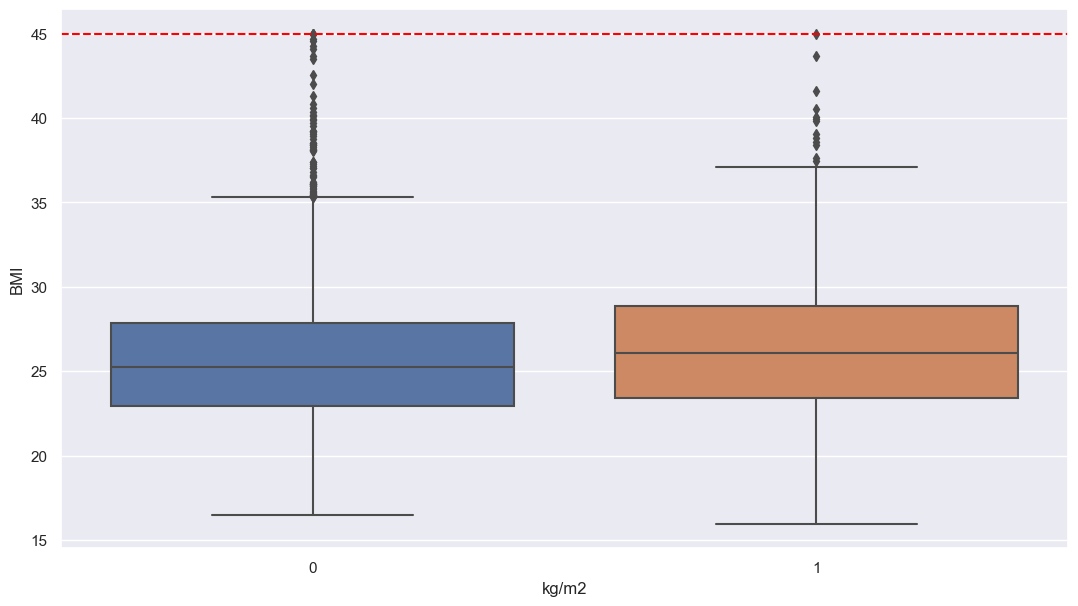

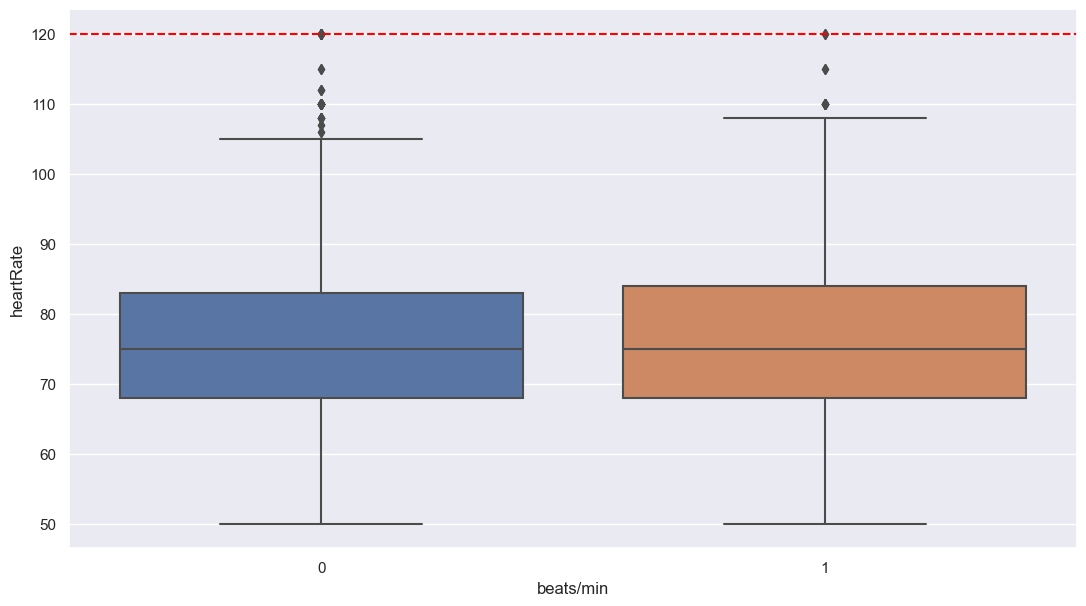

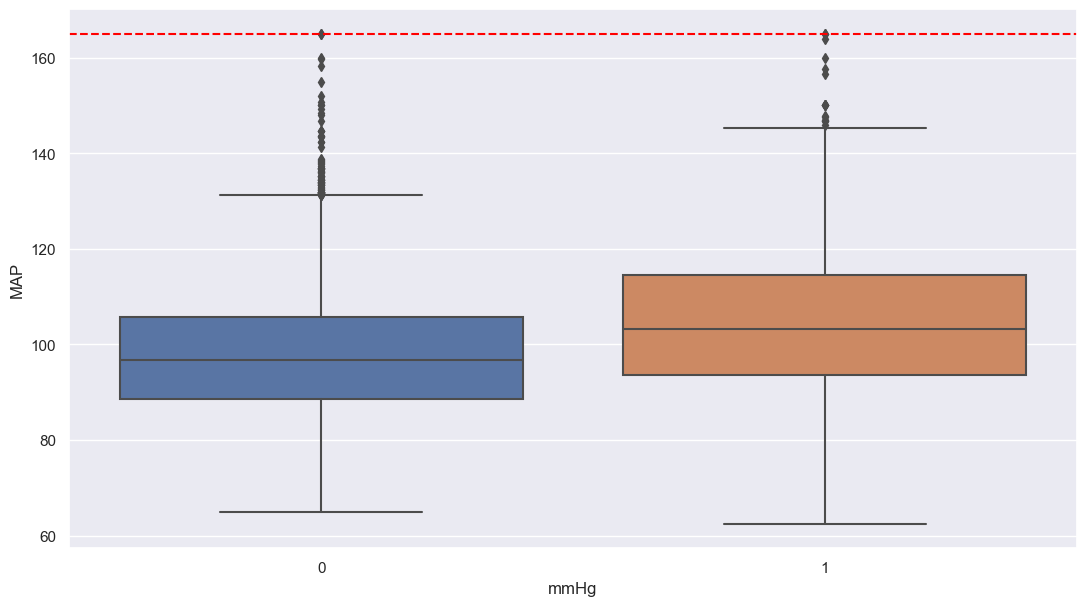

In [79]:
# Visualising the outliers with the maximum limit after Winsorising
for var, limit in zip(outlier_vars, max_limits):
  plt.figure(figsize = (13,7))
  sns.boxplot(data = data, y = var, x = 'TenYearCHD')
  plt.axhline(limit, color = 'red', linestyle = '--')
  plt.ylabel(var)
  plt.xlabel(cont_var_units[var])
  plt.show()

# Categorical Encoding

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   totChol          3390 non-null   float64
 7   BMI              3390 non-null   float64
 8   heartRate        3390 non-null   float64
 9   TenYearCHD       3390 non-null   int64  
 10  MAP              3390 non-null   float64
 11  diabetes_grade   3390 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 317.9+ KB


In [81]:

data['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [82]:
#As seen from above, sex is still of object type. Since there are only 2 classes, this feature is encoded as per the following rule

#Male - 1
#Female - 0

# Encoding sex column
data['sex'] = data['sex'].map({'M':1, 'F':0})

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   int64  
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   totChol          3390 non-null   float64
 7   BMI              3390 non-null   float64
 8   heartRate        3390 non-null   float64
 9   TenYearCHD       3390 non-null   int64  
 10  MAP              3390 non-null   float64
 11  diabetes_grade   3390 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 317.9 KB


All datatypes are in numerical datatypes

# Data Splitting

In [84]:
data

id  age  sex  cigsPerDay  BPMeds  prevalentStroke  totChol    BMI  \
0        0   64    0         3.0     0.0                0    221.0  25.38   
1        1   36    1         0.0     0.0                0    212.0  29.77   
2        2   46    0        10.0     0.0                0    250.0  20.35   
3        3   50    1        20.0     0.0                0    233.0  28.26   
4        4   64    0        30.0     0.0                0    241.0  26.42   
...    ...  ...  ...         ...     ...              ...      ...    ...   
3385  3385   60    0         0.0     0.0                0    261.0  29.28   
3386  3386   46    0         0.0     0.0                0    199.0  21.96   
3387  3387   44    1         3.0     0.0                0    352.0  28.92   
3388  3388   60    1         0.0     1.0                0    191.0  23.01   
3389  3389   54    0         0.0     0.0                0    288.0  29.88   

      heartRate  TenYearCHD         MAP  diabetes_grade  
0          90.0           1  106.000000               2  
1          72.0           0  121.333333               2  
2          88.0           0   86.000000               2  
3          68.0           1  111.333333               2  
4          70.0           0  102.166667               2  
...         ...         ...         ...             ...  
3385       70.0           0   93.833333               3  
3386       80.0           0   71.333333               2  
3387       73.0           1  134.000000               2  
3388       80.0           0  125.666667               2  
3389       79.0           0   92.666667               2  

[3390 rows x 12 columns]

In [85]:
X = data.drop(['TenYearCHD', 'id'], axis = 1)
Y = data['TenYearCHD']

# Visualising the input data
X.head()

age  sex  cigsPerDay  BPMeds  prevalentStroke  totChol    BMI  heartRate  \
0   64    0         3.0     0.0                0    221.0  25.38       90.0   
1   36    1         0.0     0.0                0    212.0  29.77       72.0   
2   46    0        10.0     0.0                0    250.0  20.35       88.0   
3   50    1        20.0     0.0                0    233.0  28.26       68.0   
4   64    0        30.0     0.0                0    241.0  26.42       70.0   

          MAP  diabetes_grade  
0  106.000000               2  
1  121.333333               2  
2   86.000000               2  
3  111.333333               2  
4  102.166667               2

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8, stratify = Y, shuffle = True)

In [87]:
Y_train.value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

In [88]:
Y_test.value_counts()

0    576
1    102
Name: TenYearCHD, dtype: int64

There is not a large number of data, and with 9 independent input features, a larger train-test split of 80-20 is chosen to allow the model to learn from a more diverse set of examples

# Handling Imbalanced Datase

The dataset is imbalanced since the classes in the variable to be predicted are not equally distributed. There are more number of people who do not have a risk of CVD compared to those who do. This can be seen in the below plot of the train data

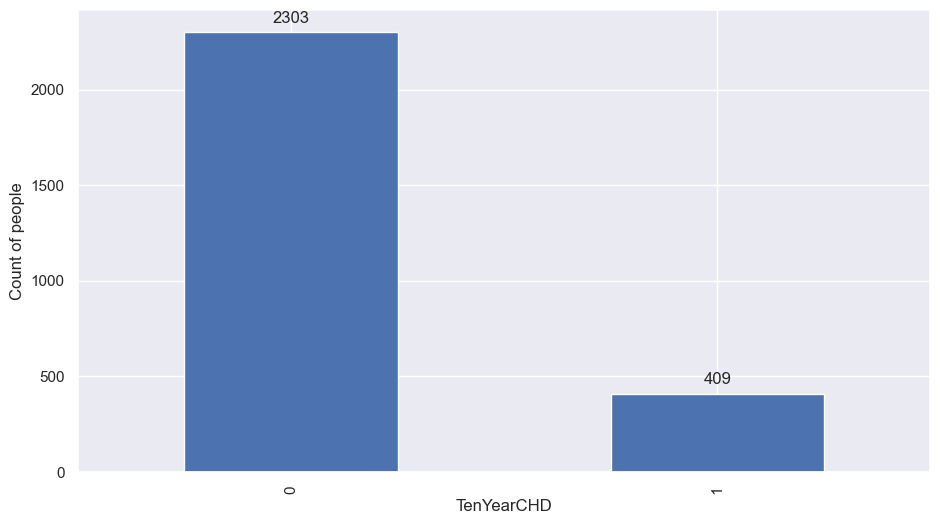

In [89]:
plt.figure(figsize = (11, 6))
ax = Y_train.value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel('TenYearCHD')
display_vals(ax)

In [90]:
# Handling Imbalanced Dataset
smote = SMOTE(random_state = 8)
X_smote, Y_train_final = smote.fit_resample(X_train, Y_train)

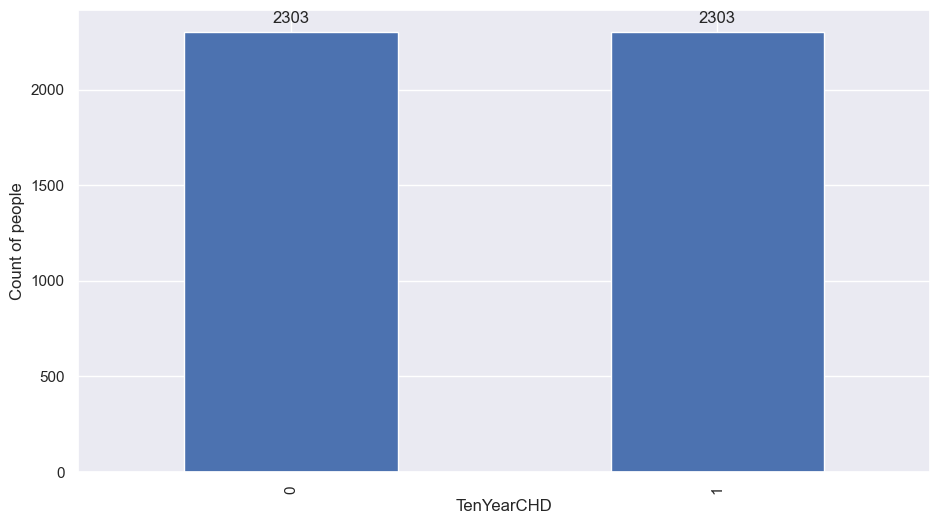

In [91]:
# Visualising the class balance after using SMOTE
plt.figure(figsize = (11, 6))
ax = Y_train_final.value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel('TenYearCHD')
display_vals(ax)

# Data Scaling

In [92]:
# Scaling the train and test data according to train data
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_smote)
X_test_final = scaler.transform(X_test)

# ML Model Implementation

In [93]:
# Function to plot the Confusion Matrix
def confusion_plot(cm):
  '''Plots the Confusion Matrix given as input'''
  cmd = ConfusionMatrixDisplay(cm, display_labels = ['No risk (0)', 'Risk (1)'])
  cmd.plot(cmap = 'Blues')
  plt.title('Confusion Matrix for Test Data')
  plt.show()

# Function to train and test a given classification model
def model_train_test(model, train_x, train_y, test_x, test_y, gs = False, confusion = True):
  '''Trains the classification model given as input. Other inputs include Test and train data
  and a Boolean to inform the function if GridSearch is being performed
  Returns the train and test Recalls and ROC-AUC scores, the test data predictions, and the final model'''
  
  model.fit(train_x, train_y)
  if gs == True:
    print(f'Best model parameters are: {model.best_params_}')
    print(f'Best model score is: {model.best_score_}\n')
    model = model.best_estimator_
  
  # Getting the train and test predictions
  train_preds = model.predict(train_x)
  train_recall = recall_score(y_true = train_y, y_pred = train_preds, average='binary')
  train_roc = roc_auc_score(train_y, train_preds)
  test_preds = model.predict(test_x)
  test_recall = recall_score(y_true = test_y, y_pred = test_preds, average='binary')
  test_roc = roc_auc_score(test_y, test_preds)
  
  # Plotting confusion matrix
  if confusion == True:
    confusion_plot(confusion_matrix(test_y, test_preds))

  output_metrics = {'Train Recall':train_recall, 'Test Recall':test_recall, 'Train ROC-AUC':train_roc, 'Test ROC-AUC':test_roc}
  return output_metrics, test_preds, model
     

In [94]:
# Creating a dictionary of lists to store Train and test Recalls and ROC-AUC scores
scores = dict()
scores['Train Recall'] = []
scores['Test Recall'] = []
scores['Train ROC-AUC'] = []
scores['Test ROC-AUC'] = []
model_names = ['Decision Tree',  'Random Forest']

# ML Model - 1 - Decision Tree

In [95]:
# Defining the Hyperparameters
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
scorer = make_scorer(recall_score, average = 'binary')

params_dt = {
              'max_depth' : [3, 4, 5],
              'min_samples_split':[10, 20, 25, 30],
              'min_samples_leaf':[10, 20, 25, 30]
              }

dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state = 42)
dt_models = GridSearchCV(dt_model, params_dt, cv = cv, scoring = scorer)

In [96]:
# Printing the train and test Recalls and ROC-AUC scores
def print_scores(model_name, model_scores):
  '''Function to print the scores of a given model'''
  print(f"The train and test recalls of the {model_name} Model are: {round(model_scores['Train Recall'] * 100, 2)}% and {round(model_scores['Test Recall'] * 100, 2)}% respectively")
  print(f"The train and test ROC-AUC scores of the {model_name} Model are: {round(model_scores['Train ROC-AUC'] * 100, 2)}% and {round(model_scores['Test ROC-AUC'] * 100, 2)}% respectively")

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 15 µs
Best model parameters are: {'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 10}
Best model score is: 0.8268791851362823



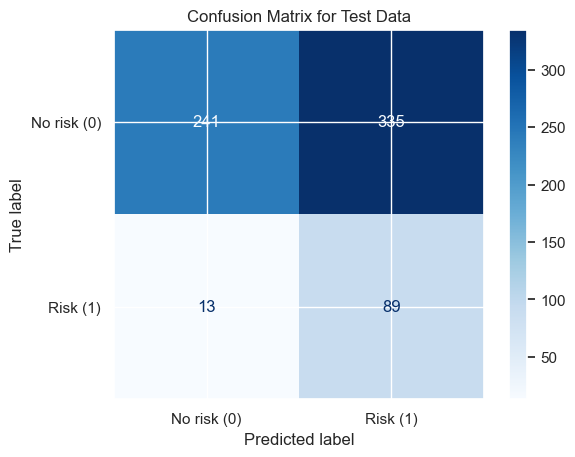

In [97]:
# Training the model
%time
dt_scores, dt_test_preds, dt_model = model_train_test(dt_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [98]:
# Classification Report
print(classification_report(Y_test, dt_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.95      0.42      0.58       576
     class-1       0.21      0.87      0.34       102

    accuracy                           0.49       678
   macro avg       0.58      0.65      0.46       678
weighted avg       0.84      0.49      0.54       678



In [99]:
# Printing the model scores 
print_scores(model_name = model_names[0], model_scores = dt_scores)

The train and test recalls of the Decision Tree Model are: 90.19% and 87.25% respectively
The train and test ROC-AUC scores of the Decision Tree Model are: 66.22% and 64.55% respectively


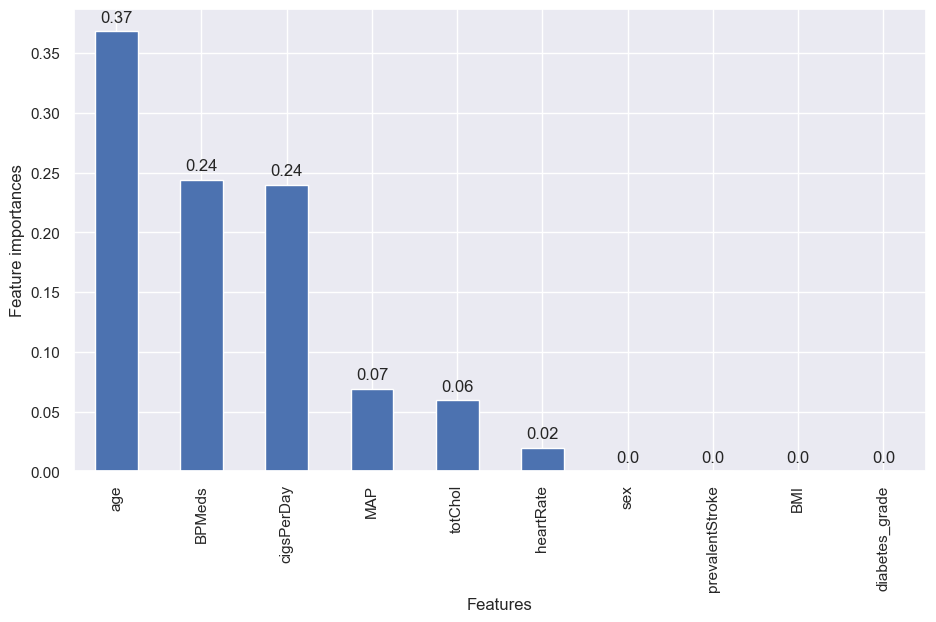

In [100]:
# Displaying the Feature importances
dt_importances = pd.Series(dt_model.feature_importances_, index = X.columns)
plt.figure(figsize = (11, 6))
ax = dt_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

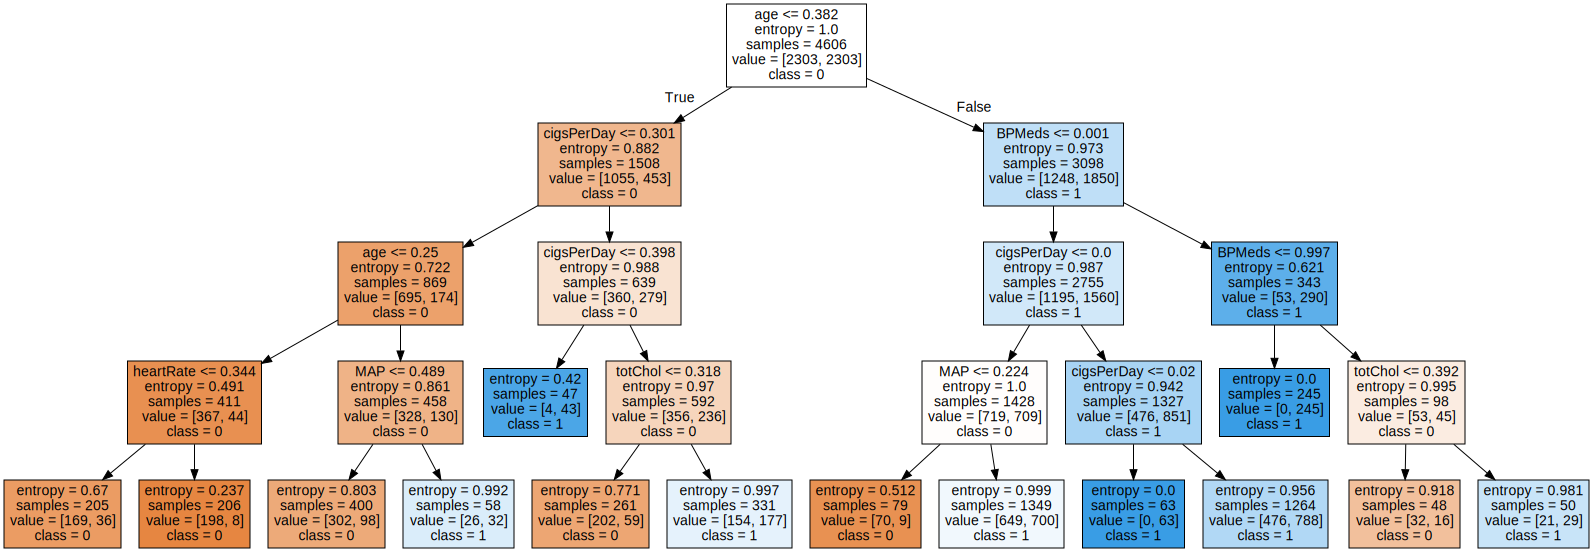

In [101]:
# Visualising the decision tree
graph = Source(tree.export_graphviz(dt_model, out_file = None, feature_names = X.columns, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format = 'svg')))


In [102]:
for score in dt_scores:
  scores[score].append(dt_scores[score] * 100)

# ML Model - 2 - Random Forest

In [103]:
# Defining the Hyperparameters
params_rf = {
              'n_estimators':[50, 100, 200],
              'max_depth':[3, 4, 5],
              'min_samples_split':[10, 20, 25],
              'min_samples_leaf':[10, 20, 25]
              }

rf_model = RandomForestClassifier(criterion= 'entropy', random_state = 42)
rf_models = GridSearchCV(rf_model, params_rf, cv = cv, scoring = scorer)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
Best model parameters are: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best model score is: 0.7820330724008929



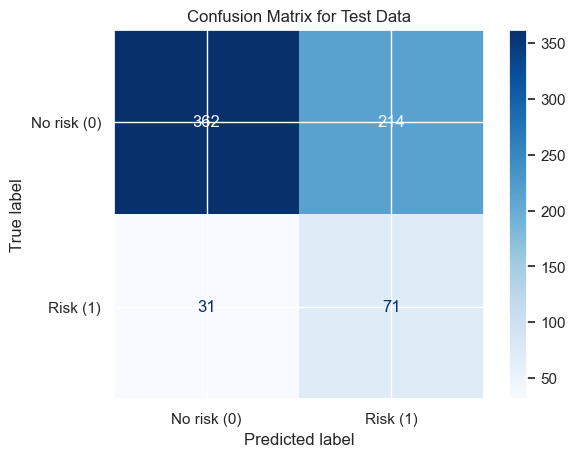

In [104]:

# Training the model
%time
rf_scores, rf_test_preds, rf_model = model_train_test(rf_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [105]:

# Classification Report
print(classification_report(Y_test, rf_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.92      0.63      0.75       576
     class-1       0.25      0.70      0.37       102

    accuracy                           0.64       678
   macro avg       0.59      0.66      0.56       678
weighted avg       0.82      0.64      0.69       678



In [106]:
# Printing the model scores
print_scores(model_name = model_names[1], model_scores = rf_scores)

The train and test recalls of the Random Forest Model are: 81.02% and 69.61% respectively
The train and test ROC-AUC scores of the Random Forest Model are: 71.84% and 66.23% respectively


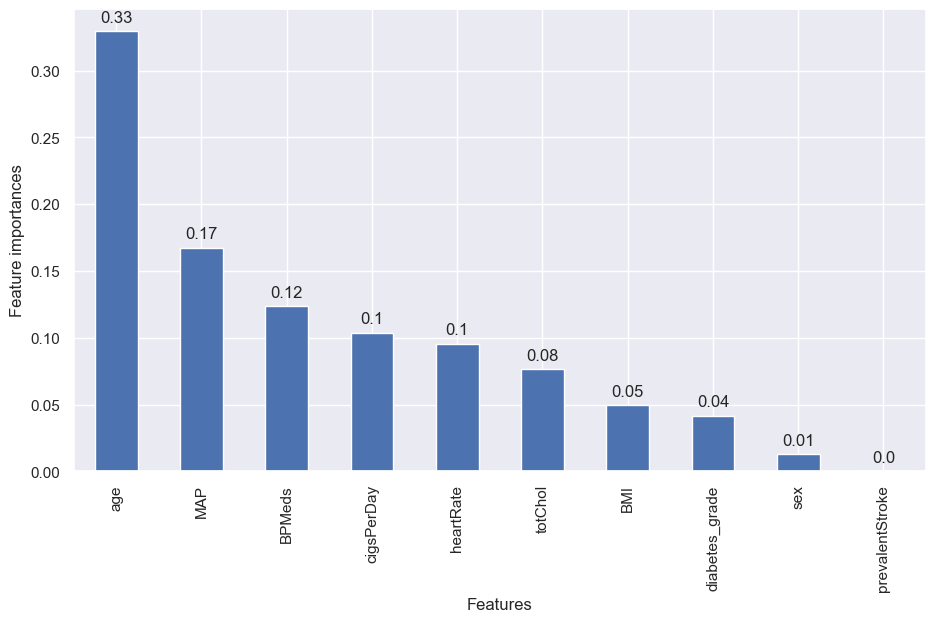

In [107]:
# Displaying Feature Importances
rf_importances = pd.Series(rf_model.feature_importances_, index = X.columns)
plt.figure(figsize = (11, 6))
ax = rf_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

In [108]:

for score in rf_scores:
  scores[score].append(rf_scores[score] * 100)

In [109]:
# Comparing the evaluation metrics from each model
results_df = pd.DataFrame(scores, index = model_names)
styler_list = [
                {'selector': 'th','props': [('border', '2px solid black')]},
                {'selector': 'td','props': [('border', '2px solid black')]}
              ]
styler = results_df.style.set_table_styles(styler_list)
display(styler)

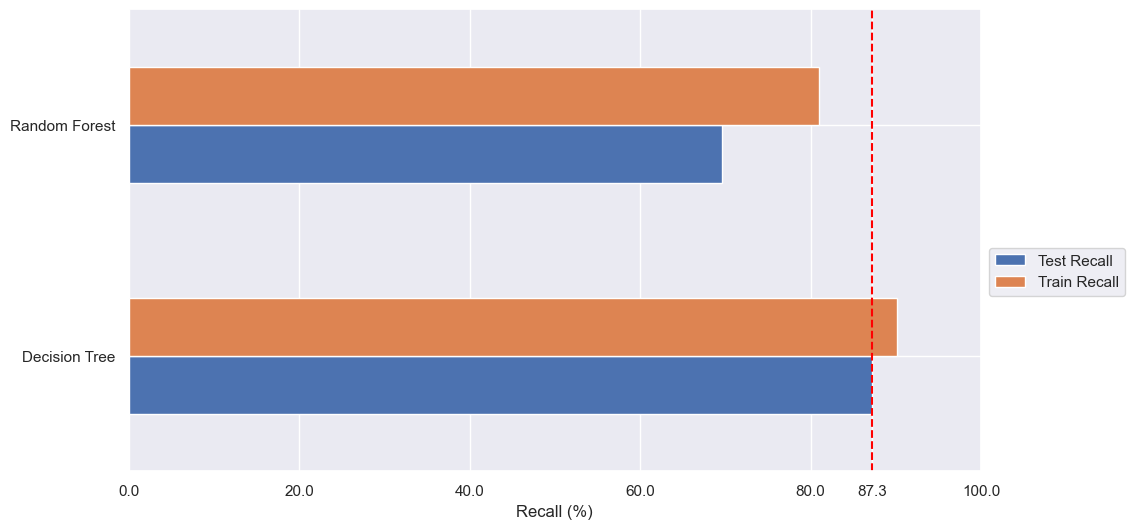


The model with maximum Test Recall is the Decision Tree model


In [110]:
# Plotting the train and test Recalls and choosing optimum model
results_df[['Test Recall', 'Train Recall']].plot(kind = 'barh', figsize = (11, 6))
plt.xlabel('Recall (%)')
plt.xlim((0, 100))
plt.xticks([0, 20, 40, 60, 80, 100, results_df['Test Recall'].max()])
plt.axvline(results_df['Test Recall'].max(), color = 'red', linestyle = '--')
plt.legend(bbox_to_anchor = (1, 0.5))
plt.show()

best_model = results_df[results_df['Test Recall'] == results_df['Test Recall'].max()].index[0]
print(f'\nThe model with maximum Test Recall is the {best_model} model')

The model with maximum Test Recall is the Decision Tree model

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

# load the diabetes dataset
diabetes = load_diabetes()

# define the feature matrix (X) and target vector (y)
X = diabetes.data
y = diabetes.target

# create a Linear Regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [133]:
from sklearn.externals import joblib

model = joblib.load('heart_disease.sav')


ImportError: cannot import name 'joblib' from 'sklearn.externals' (/home/amrit/.local/lib/python3.10/site-packages/sklearn/externals/__init__.py)